In [2]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Stats import WeightQuantization, IntroduceFaultsInWeights, GenerateFaultsList
from Training import GetDatasets
from Simulation import get_all_outputs
from Simulation import buffer_simulation, save_obj, load_obj
from funciones import compilNet, same_elements
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import tensorflow_datasets as tfds
#import tensorflow_probability as tfp

<function FuncionRound at 0x0000017753CD25E0>


In [38]:
int('',2)

8

In [40]:
int('0b111111111111',2)

4095

In [ ]:
Tareas 
#calcular tensores de máx y de mínimos para los input y outputs  viernes ok
#cociente entre en tensor máx y tensor mín                               ok 
#Hacer histograma                                                Martes
#correr redondeo_mask_0 para el resto d elas redes               Martes ok
#Redondeo en todas las redes  con todos los mask                 Martes   ok                                  
#Seleccionar las máscaras complicadas colocar en 0               Miercoles
#Seleccionar las máscaras complicada Hacert el tf invert         Miercoles

Tareas 29
#Identificar los valores distintos de 0 en el tensor de entrada 
#tensor aux=abs(tensor entrada-tensor salida)
# los valores en 0 los llevo a 1
#tensor cociente=tensor_aux/tensor entrada(tf.where(tf.not_equal(tensor entrada,0)))

# voltear la máscara al inicio i contar cuantas he volteado y las que no he volteado
#direcciones que he volteado

investigar
distancia de hamming
distancia de lebichtime


In [3]:
trainBatchSize = testBatchSize = 1
_,_,test_dataset = GetDatasets('colorectal_histology',(80,5,15),(227,227), 8, trainBatchSize, testBatchSize)

In [4]:
word_size  = 16
afrac_size = 11  
aint_size  = 4
wfrac_size = 11
wint_size  = 4


cwd = os.getcwd()
wgt_dir = os.path.join(cwd, 'Data')
wgt_dir = os.path.join(wgt_dir, 'Trained Weights')
wgt_dir = os.path.join(wgt_dir, 'AlexNet')
wgt_dir = os.path.join(wgt_dir, 'Colorectal Dataset')
wgt_dir = os.path.join(wgt_dir,'Weights')

In [75]:
Cargar_errores = True



if Cargar_errores:
    locs  = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/locs_054')
    error_mask = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/error_mask_054')
#locs= locs[0:20]  
#error_mask=error_mask[0:20]
    
#print('mostrando las 5 primeras direcciones con fallos')
#print('direcciones:',locs)
print('mascara de fallos:',error_mask)
#print(len(error_mask))
#print(len(locs))

mascara de fallos: ['x0xxxxxxx0xxxxxx', 'x0xxxxxxx0xxxxxx', 'x0xxxxxxx0xxxxxx', 'x0xxxxxxx0xxxxxx', 'x1xxxxxxx0xxxxxx', 'x0xxxxxxx1xxxxxx', 'xxxxxx1xxxxxxx1x', 'x1xxxxxxx1xxxxxx', 'x1xxxxxxx1xxxxxx', 'x0xxxxxxx0xxxxxx', 'x1xxxxxxx1xxxxxx', 'x0xxxxxxx1xxxxxx', 'x1xxxxxxx0xxxxxx', 'x1xxxxxxx1xxxxxx', 'x1xxxxxxx0xxxxxx', 'x1xxxxxxx1xxxxxx', 'x1xxxxxxx1xxxxxx', 'x1xxxxxxx1xxxxxx', 'x0xxxxxxx1xxxxxx', 'x0xxxxxxx0xxxxxx']


In [ ]:
## Voltear la máscara donde los bits más sifnificativos estén afectados
## y los menos significativos esten en xxxx

In [84]:
error_mask = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/error_mask_054')
def FlipMask(error_mask):
    error_mask_flip=[]
    count_flip=0
    #print('máscara original',error_mask)
    len_error_mask= len(error_mask)
    print('Tamaño de máscara ',len_error_mask)
    for i,j in enumerate(error_mask):
        #print(j[0:4])
        
        if '0'  in j[0:4] or '1'  in j[0:4] and j.endswith('xxxx'):
            error_volteado=(j[::-1])
            error_mask_flip.append(error_volteado)
            count_flip = count_flip + 1
        else:
            error_mask_flip.append(j)
    wth_flip=len_error_mask- count_flip       
    print('cantidad volteada',count_flip)
    print('cantidad sin voltear',wth_flip)
    
    #print('Máscara volteada',error_mask_flip)
    print('tamaño de Máscara volteada ',len(error_mask_flip))
    return error_mask_flip,count_flip 
        

In [85]:
FlipMask(error_mask)
save_obj(error_mask,'Data/Fault Characterization/mask_volteada/vc_707/error_mask_054')
save_obj(locs,'Data/Fault Characterization/mask_volteada/vc_707/locs_054')


Tamaño de máscara  4738
cantidad volteada 2507
cantidad sin voltear 2231
tamaño de Máscara volteada  4738


In [77]:
## Convirtiendo la mascara de fallos en 0

In [ ]:
Cargar_errores = False
abuffer_size=16777216
word_size  = 16

#print(load_file('Data/Fault Characterization/wgt/Accs_w_707_55'))

if Cargar_errores:
    #locs  = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/locs_0_60')
    #error_mask = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/error_mask_0_60')
    locs  = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/locs_0_54')
    print('entre')
    error_mask = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-705/error_mask_705_0_54')
else:
    #locs  = load_obj('Data/Fault Characterization/error_mask_30/vc_707/locs_054')
    #numero_bits_con_fallo = len(locs)
    #bits_con_fallo = np.random.randint(0,1,numero_bits_con_fallo)
    #mbuffer = np.array(['0']*(abuffer_size-numero_bits_con_fallo))
    #mbuffer = np.concatenate([mbuffer,bits_con_fallo])
    ##Convertirlo en vectores de 16 elementos
    #mbuffer = np.reshape(mbuffer,(-1,word_size))
    #mbuffer = ["".join(i) for i in mbuffer]
    #error_mask=mbuffer[0:numero_bits_con_fallo]
    ##more_posiction_errors=len(error_mask)-len(locs)
#save_obj(locs,'Data/Fault Characterization/error_mask_0/vc_707/locs_060')
#save_obj(error_mask,'Data/Fault Characterization/error_mask_0/vc_707/error_mask_060')
print('mostrando las 5 primeras direcciones con fallos')
print('direcciones:',locs[0:5])
print('mascara de fallos:',error_mask[0:100])
print(len(error_mask))
#print(more_posiction_errors)
print(len(locs))
#save_obj(locs,'Data/Fault Characterization/error_mask_0x_30/locs_0'+str(vol))
#save_obj(error_mask,'Data/Fault Characterization/error_mask_0x_30/error_mask_0'+str(vol))


In [ ]:
# Creo la red con el experimento original

In [6]:
from Nets_original import GetNeuralNetworkModel
NetOriginal = GetNeuralNetworkModel('AlexNet', (227,227,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                             aging_active=True, word_size=word_size, frac_size=afrac_size, batch_size = testBatchSize)



# Cuantizacion de los pesos

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
NetOriginal.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
NetOriginal.load_weights(wgt_dir).expect_partial()
WeightQuantization(model = NetOriginal, frac_bits = 11, int_bits = 4)
#loss,acc =NetOriginal.evaluate(test_dataset)

In [ ]:
# Ontengo la deferencias por capas entre las entradas y salidas de las capas Lambdas pasando un aimagen del dataset

In [18]:

write_layer=[2,8,10,16,18,24,30,36,38,44,49,53]

diff_inp_output=[]
razon=[]
capa=[]
numero=[]
#with pd.ExcelWriter('Analizando_fichero_detalle/diferencias_entre_resultados/Alexnet_mask_0.xlsx') as writer:
    
for i,j in enumerate(write_layer):
        
        
        print('Capa',j,NetOriginal.layers[j].__class__.__name__)
        capa.append(NetOriginal.layers[j].__class__.__name__)
        numero.append(j)
        #X = [x for x,y in test_dataset]
        image = next(iter(test_dataset))[0]
        #salidas del modelo sin fallas para la primer imagen del dataset de prueba
        out= get_all_outputs(NetOriginal,image)
        #salidas del modelo con fallas para la primer imagen del dataset de prueba
        out_quantizacion = out[j-1]
        print('out_quantizacion',out_quantizacion)
        out_error_and_correction = out[j]
        tensor_aux= tf.math.abs(tf.math.subtract(out_quantizacion,out_error_and_correction ))
        print('tensor_aux',tensor_aux)
        input_sin_ceros=tf.where(tf.equal(out_quantizacion,0),tf.ones_like(out_quantizacion),out_quantizacion)
        print('input_sin_ceros',tf.where(input_sin_ceros==0))      
        tensor_cociente=tf.math.divide(tensor_aux,input_sin_ceros)
        print('tensor_cociente',tensor_cociente)
        tensor_cociente  = tf.where(tf.less(tensor_cociente, 1), 1/tensor_cociente , tensor_cociente )
        print('tensor_cociente final',tensor_cociente)
    
        
       
        #out_input= tf.math.reduce_sum(tf.math.abs(tf.math.subtract(out_quantizacion,out_error_and_correction )))
        #diff_inp_output.append(out_input.numpy())
        #cociente=tf.math.divide(tf.math.abs(out_quantizacion),tf.math.abs(out_error_and_correction))
        #print('cociente',cociente)
        #out_output=tf.math.divide(tf.math.reduce_sum(tf.math.abs(out_quantizacion)),tf.math.reduce_sum(tf.math.abs(out_error_and_correction)))
        #razon.append(out_output.numpy())
        ##print('maxima diferencia: ',np.max(np.abs(outputs1[index]-outputs2[index])))
        #print(' diferencia absoluta input y outputs: ', diff_inp_output)
        ##print('razón absoluta entre input y outputs: ', tf.math.reduce_sum(tf.math.abs(tf.math.divide (out_quantizacion,out_error_and_correction ))))
        #print('razón',razon)
#df_numero=pd.DataFrame(numero)
#df_capa = pd.DataFrame(capa)   
#df_inp_output=pd.DataFrame(diff_inp_output)
#df_razon=pd.DataFrame(razon)
    
    
#buf_diff_inp_out = pd.concat([df_numero,df_capa,df_inp_output,df_razon], axis=1, join='outer')
#buf_diff_inp_out.columns = ['numero','Capa','df_inp_output','df_razon']
#with pd.ExcelWriter('Analizando_fichero_detalle/diferencias_entre_resultados/Alexnet_mask_0_borrar_prueba.xlsx') as writer:
    #buf_diff_inp_out.to_excel(writer, sheet_name='buf_diff_inp_out', index=False)
      
        

Capa 2 Lambda
out_quantizacion [[[[0.953125   0.953125   0.953125  ]
   [0.953125   0.953125   0.953125  ]
   [0.95214844 0.9536133  0.953125  ]
   ...
   [0.9453125  0.953125   0.94140625]
   [0.9453125  0.953125   0.94140625]
   [0.9453125  0.953125   0.94140625]]

  [[0.953125   0.953125   0.953125  ]
   [0.953125   0.953125   0.953125  ]
   [0.9526367  0.953125   0.953125  ]
   ...
   [0.9453125  0.953125   0.94140625]
   [0.9453125  0.953125   0.94140625]
   [0.9453125  0.953125   0.94140625]]

  [[0.953125   0.953125   0.953125  ]
   [0.953125   0.953125   0.953125  ]
   [0.953125   0.953125   0.953125  ]
   ...
   [0.9453125  0.953125   0.94140625]
   [0.9453125  0.953125   0.94140625]
   [0.9453125  0.953125   0.94140625]]

  ...

  [[0.953125   0.9609375  0.95703125]
   [0.953125   0.9609375  0.95703125]
   [0.953125   0.9609375  0.95703125]
   ...
   [0.95410156 0.9609375  0.95751953]
   [0.95458984 0.96240234 0.9584961 ]
   [0.9560547  0.9638672  0.95996094]]

  [[0.953125  

out_quantizacion [[[[-0.0234375   0.02294922 -0.08105469 ...  1.0708008   1.456543
     0.        ]
   [-0.0234375   0.02294922 -0.08105469 ...  1.0620117   1.4628906
     0.        ]
   [-0.0234375   0.02294922 -0.08105469 ...  1.0708008   1.4628906
     0.        ]
   ...
   [-0.0234375   0.02294922 -0.08105469 ...  1.1181641   1.4785156
     0.        ]
   [-0.0234375   0.02294922 -0.08105469 ...  1.1201172   1.4638672
     0.        ]
   [-0.0234375   0.02294922 -0.08105469 ...  1.0981445   1.4638672
     0.        ]]

  [[-0.0234375   0.02294922 -0.08105469 ...  1.0708008   1.456543
     0.        ]
   [-0.0234375   0.02294922 -0.08105469 ...  2.0986328   1.6630859
     0.        ]
   [-0.0234375   0.02294922 -0.08105469 ...  2.0986328   1.6630859
     0.        ]
   ...
   [-0.0234375   0.02294922 -0.08105469 ...  1.8974609   1.8066406
     0.        ]
   [-0.0234375   0.02294922 -0.08105469 ...  1.5712891   1.7387695
     0.        ]
   [-0.0234375   0.02294922 -0.08105469 ...  

out_quantizacion [[[[-0.19238281 -1.2431641  -0.4711914  ... -0.3696289  -0.21044922
     1.2192383 ]
   [ 0.12255859 -1.2431641  -0.4711914  ...  0.56396484 -0.21044922
    -0.33007812]
   [-0.2763672  -1.2431641  -0.4711914  ...  0.43896484 -0.21044922
    -0.33007812]
   ...
   [-0.10205078 -1.2431641  -0.4711914  ...  0.22363281 -0.21044922
    -0.33007812]
   [-1.1430664  -1.2431641  -0.4711914  ...  1.0522461  -0.21044922
    -0.33007812]
   [-1.2636719  -0.28222656 -0.4711914  ...  1.0952148  -0.21044922
    -0.33007812]]

  [[ 0.5332031  -1.2431641  -0.4711914  ... -0.08105469 -0.21044922
     2.354004  ]
   [ 0.23632812 -1.2431641  -0.4711914  ...  0.7988281  -0.21044922
    -0.33007812]
   [-0.52197266 -1.2431641  -0.4711914  ...  0.4814453  -0.21044922
    -0.33007812]
   ...
   [ 0.6381836  -0.80810547 -0.4711914  ...  0.35205078 -0.21044922
    -0.33007812]
   [-0.44335938 -1.2431641  -0.4711914  ...  1.4575195  -0.21044922
    -0.33007812]
   [-1.2636719   0.70947266 -0.4

out_quantizacion [[[[-0.40625    -0.39111328 -0.6220703  ... -0.25732422 -0.5004883
    -0.13427734]
   [-0.40625    -0.39111328 -0.6220703  ...  0.31835938  0.18261719
     0.9433594 ]
   [-0.40625    -0.39111328 -0.6220703  ... -0.1821289   0.76953125
     0.02392578]
   ...
   [-0.40625    -0.39111328 -0.57666016 ... -0.27685547  1.5527344
    -0.09228516]
   [-0.40625    -0.39111328  0.00537109 ...  0.37695312 -0.5727539
    -0.12988281]
   [-0.40625    -0.39111328  0.33642578 ... -0.25        0.37402344
    -0.5834961 ]]

  [[-0.40625    -0.39111328 -0.6220703  ...  0.67626953 -0.5727539
     0.97509766]
   [-0.40625    -0.39111328 -0.6220703  ...  1.9047852  -0.5727539
     2.4404297 ]
   [-0.40625    -0.39111328 -0.6220703  ...  0.9682617  -0.5727539
     0.61865234]
   ...
   [-0.40625    -0.39111328 -0.17333984 ...  1.824707   -0.5727539
     0.48779297]
   [-0.40625    -0.39111328  0.49414062 ...  1.7563477  -0.5727539
     0.62060547]
   [-0.40625    -0.39111328  1.4199219  

out_quantizacion [[[[-0.45458984 -0.75097656 -0.65722656 ...  0.38671875  0.50927734
     0.37402344]
   [-0.6616211  -0.75097656 -0.65722656 ...  1.7666016  -0.7451172
     1.7080078 ]
   [-0.6616211  -0.75097656 -0.65722656 ...  1.0854492  -0.3173828
     1.1601562 ]
   ...
   [-0.6616211  -0.75097656 -0.65722656 ...  1.6860352  -0.7451172
     0.05761719]
   [ 0.02148438 -0.75097656 -0.65722656 ...  1.3779297  -0.7451172
     0.42871094]
   [-0.6616211  -0.75097656 -0.38378906 ...  1.3046875  -0.7451172
     1.6616211 ]]

  [[ 1.8730469  -0.75097656 -0.65722656 ...  1.5908203  -0.7451172
    -0.78759766]
   [ 0.9243164  -0.75097656 -0.65722656 ...  4.010742   -0.7451172
    -0.4741211 ]
   [-0.15576172 -0.75097656 -0.65722656 ...  2.6894531  -0.7451172
    -0.20458984]
   ...
   [ 0.9667969  -0.75097656 -0.65722656 ...  2.4018555  -0.7451172
    -0.2890625 ]
   [-0.43945312 -0.75097656 -0.65722656 ...  2.709961   -0.7451172
     1.9462891 ]
   [-0.6616211  -0.75097656 -0.65722656 ..

out_quantizacion [[0.         0.82421875 0.         ... 0.         0.         0.        ]]
tensor_aux tf.Tensor([[0. 0. 0. ... 0. 0. 0.]], shape=(1, 4096), dtype=float32)
input_sin_ceros tf.Tensor([], shape=(0, 2), dtype=int64)
tensor_cociente tf.Tensor([[0. 0. 0. ... 0. 0. 0.]], shape=(1, 4096), dtype=float32)
tensor_cociente final tf.Tensor([[inf inf inf ... inf inf inf]], shape=(1, 4096), dtype=float32)
Capa 49 Lambda
out_quantizacion [[0. 0. 0. ... 0. 0. 0.]]
tensor_aux tf.Tensor([[0. 0. 0. ... 0. 0. 0.]], shape=(1, 4096), dtype=float32)
input_sin_ceros tf.Tensor([], shape=(0, 2), dtype=int64)
tensor_cociente tf.Tensor([[0. 0. 0. ... 0. 0. 0.]], shape=(1, 4096), dtype=float32)
tensor_cociente final tf.Tensor([[inf inf inf ... inf inf inf]], shape=(1, 4096), dtype=float32)
Capa 53 Lambda
out_quantizacion [[1.11641966e-04 1.97957226e-04 7.00164593e-10 2.44179361e-08
  4.94978517e-01 9.12877240e-09 5.04248440e-01 4.63421427e-04]]
tensor_aux tf.Tensor(
[[1.11641966e-04 1.97957226e-04 7

In [18]:
tensor = tf.constant([[0, 2, 0], [4, 0, 6]])
#tensor_zeros=tf.zeros_like(tensor)
print(tensor)
print(tf.math.equal(tensor,0))
input_sin_ceros=tf.where(tf.math.not_equal(tensor,0), tensor ,1 )
print('input_sin_ceros',input_sin_ceros)


tf.Tensor(
[[0 2 0]
 [4 0 6]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ True False  True]
 [False  True False]], shape=(2, 3), dtype=bool)
input_sin_ceros tf.Tensor(
[[1 2 1]
 [4 1 6]], shape=(2, 3), dtype=int32)


In [ ]:
#calcular tensores de máx y de mínimos para los input y outputs  viernes
#cociente entre en tensor máx y tensor mín 
#Hacer histograma   

## Función para analizar resultados de los experimentos 

In [8]:
def AnlyzExp(net,Layer ):
    write_layer=Layer

    diff_inp_output=[]
    razon=[]
    capa=[]
    numero=[]
    max_value_inp = []
    mean_inp = []
    min_value_inp = []
    max_value_out = []
    mean_out = []
    min_value_out = []
    ratio_input = []
    ratio_output = []
    

        
    for i,j in enumerate(write_layer):
        print('Capa',j,net.layers[j].__class__.__name__)
        capa.append(net.layers[j].__class__.__name__)
        numero.append(j)
        #X = [x for x,y in test_dataset]
        X = next(iter(test_dataset))[0]
        out= get_all_outputs(net,X)
        #salidas del modelo con fallas para la primer imagen del dataset de prueba
        out_quantizacion = out[j-1]
        print(out_quantizacion.shape)
        out_error_and_correction = out[j]
        #out_input= tf.math.reduce_sum(tf.math.abs(tf.math.subtract(out_quantizacion,out_error_and_correction )))
        #diff_inp_output.append(out_input.numpy())
        #cociente=tf.math.divide(tf.math.abs(out_quantizacion),tf.math.abs(out_error_and_correction))  
        ## Al cociente buscar los elementos menores que 1, Creo un tensor unitario del mismo tamaño que el tensor
        #cociente y tensor_unitario/cociente luego obtengo un tensor con todos los valores mayores que 1 y los sumo
        max_value_inp.append(np.max(out_quantizacion))
        min_value_inp.append(np.min(out_quantizacion))
        ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))
        mean_inp.append(np.mean(out_quantizacion))
        max_value_out.append(np.max(out_error_and_correction))
        min_value_out.append(np.min(out_error_and_correction))
        ratio_out = np.abs(np.divide (max_value_out,min_value_out ))                 
        mean_out.append(np.mean(out_error_and_correction))
        
    
    
    print('maxima valor del input: ',max_value_inp)
    print('mínimo valor del input: ',min_value_inp)
    print('maxima valor del out: ',max_value_out)
    print('mínimo valor del out: ',min_value_out)
    print('ratio input: ',ratio_inp)
    print('ratio out: ',ratio_out)
    print('mean input: ',mean_inp)
    print('mean out: ',mean_out)
    df_numero = pd.DataFrame(numero)
    df_capa = pd.DataFrame(capa)   
    df_max_value_inp = pd.DataFrame(max_value_inp)
    df_min_value_inp = pd.DataFrame(min_value_inp)
    df_ratio_inp = pd.DataFrame(ratio_inp)
    df_mean_inp = pd.DataFrame(mean_inp)
    df_max_value_out = pd.DataFrame(max_value_out)
    df_min_value_out = pd.DataFrame(min_value_out)
    df_ratio_out = pd.DataFrame(ratio_out)
    df_mean_out = pd.DataFrame(mean_out)        
    buf_statistics = pd.concat([df_numero, df_capa, df_max_value_inp, df_min_value_inp, df_ratio_inp, df_mean_inp,
                              df_max_value_out, df_min_value_out, df_ratio_out, df_mean_out], axis=1, join='outer')
    buf_statistics.columns = ['numero','capa','max_value_inp','min_value_inp','ratio_inp','mean_inp',
                              'max_value_out','min_value_out','ratio_out','mean_out']
    print(buf_statistics)
    #writer=pd.ExcelWriter('AlexNet/actv_error'+ str(architecture)+'.xlsx', engine='xlsxwriter')


    #f_error.to_excel(writer,sheet_name=architecture, index=False)
    with pd.ExcelWriter('Analizando_fichero_detalle/diferencias_entre_resultados/net.xlsx') as writer:
        buf_statistics.to_excel(writer, sheet_name='net', index=False)
      
          
            

In [21]:
write_layer=[2,8,10,16,18,24,30,36,38,44,49,53]

diff_inp_output=[]
razon=[]
capa=[]
numero=[]
max_value_inp = []
mean_inp = []
min_value_inp = []
max_value_out = []
mean_out = []
min_value_out = []
ratio_input = []
ratio_output = []

with pd.ExcelWriter('Analizando_fichero_detalle/diferencias_entre_resultados/Estadísticas_prueba_borrar.xlsx') as writer:
    
    for i,j in enumerate(write_layer):
        print('Capa',j,NetOriginal.layers[j].__class__.__name__)
        capa.append(NetOriginal.layers[j].__class__.__name__)
        numero.append(j)
        X = next(iter(test_dataset))[0]
        out= get_all_outputs(NetOriginal,X[0])
        #salidas del modelo sin fallas para la primer imagen del dataset de prueba
       # out= get_all_outputs(NetOriginal,image)
        out= get_all_outputs(NetOriginal,X)
        #print ('out',out[1])
        #out=get_all_outputs(Net2,iterator)
        #salidas del modelo con fallas para la primer imagen del dataset de prueba
        out_quantizacion = out[j-1]
        print(out_quantizacion.shape)
        out_error_and_correction = out[j]
        out_input= tf.math.reduce_sum(tf.math.abs(tf.math.subtract(out_quantizacion,out_error_and_correction )))
        #diff_inp_output.append(out_input.numpy())
        #out_output=tf.math.divide(tf.math.reduce_sum(tf.math.abs(out_quantizacion)),tf.math.reduce_sum(tf.math.abs(out_error_and_correction)))
        #razon.append(out_output.numpy())
        max_value_inp.append(np.max(out_quantizacion))
        min_value_inp.append(np.min(out_quantizacion))
        ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))
        mean_inp.append(np.mean(out_quantizacion))
        max_value_out.append(np.max(out_error_and_correction))
        min_value_out.append(np.min(out_error_and_correction))
        ratio_out = np.abs(np.divide (max_value_out,min_value_out ))                 
        mean_out.append(np.mean(out_error_and_correction))
        
        
        
        print('maxima valor del input: ',max_value_inp)
        print('mínimo valor del input: ',min_value_inp)
        print('maxima valor del out: ',max_value_out)
        print('mínimo valor del out: ',min_value_out)
        print('ratio input: ',ratio_inp)
        print('ratio out: ',ratio_out)
        print('mean input: ',mean_inp)
        print('mean out: ',mean_out)
    df_numero = pd.DataFrame(numero)
    df_capa = pd.DataFrame(capa)   
    df_max_value_inp = pd.DataFrame(max_value_inp)
    df_min_value_inp = pd.DataFrame(min_value_inp)
    df_ratio_inp = pd.DataFrame(ratio_inp)
    df_mean_inp = pd.DataFrame(mean_inp)
    df_max_value_out = pd.DataFrame(max_value_out)
    df_min_value_out = pd.DataFrame(min_value_out)
    df_ratio_out = pd.DataFrame(ratio_out)
    df_mean_out = pd.DataFrame(mean_out)        
    buf_statistics = pd.concat([df_numero, df_capa, df_max_value_inp, df_min_value_inp, df_ratio_inp, df_mean_inp,
                              df_max_value_out, df_min_value_out, df_ratio_out, df_mean_out], axis=1, join='outer')
    buf_statistics.columns = ['numero','capa','max_value_inp','min_value_inp','ratio_inp','mean_inp',
                              'max_value_out','min_value_out','ratio_out','mean_out']
    print(buf_statistics)
    buf_statistics.to_excel(writer, sheet_name='Alexnet_Original', index=False)
      
        

Capa 2 Lambda


ValueError: Input 0 is incompatible with layer model_17: expected shape=(None, 227, 227, 3), found shape=(227, 227, 3)

In [ ]:
## Graficar Histograma 

In [17]:
import matplotlib.pyplot as pltNew
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib


def graficar(bit, frec,j):
    fig= plt.figure(figsize=(20,5), dpi= 100)
    plt.rcParams.update({'font.size': 10})
    fig, ax = plt.subplots()
    
    
    a= ax.bar(x=bit, height = frec,color='g')
    #ax.set_title('Number of errors by words')
    ax.set_xlabel('Bits')
    ax.set_ylabel('Frequency')
    plt.grid(color = 'gray', linestyle = 'dashed')
    ax.bar_label(ax.containers[0])
    
    #pdfFile=PdfPages("Number_errors_words_" +str(j)+".pdf")
    #pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
    #pdfFile.close()
    
    
    
    plt.tight_layout()
    

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plot
from FileAnalize import analize_file, analize_file_uno,analize_file_uno_ceros, save_file, load_file
from funciones import *
from datetime import datetime
import numpy as np
import pandas as pd
from collections import Counter
import pathlib
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


ruta_bin = 'Data\Fault Characterization\VC707\RawData'       
#ruta_bin = 'Data\Fault Characterization\VC707\RawData\VC707-0.54.bin'
#ruta_bin = 'Data/Fault Characterization/KC705_B/RowData'
directorio = pathlib.Path(ruta_bin)


#variantes= [analize_file, analize_file_uno, analize_file_uno_ceros]
ficheros = [fichero.name for fichero in directorio.iterdir()]

buffer_size=33751040
#buffer_size=29163520

#repeticiones = [0] * len(error_mask)
c=[]
bit=[]
frec=[]
count=0
for i, j in enumerate(ficheros):
    c=[]
    directorio= os.path.join(ruta_bin, j)
    print(directorio)
    buffer= (analize_file_uno(directorio, buffer_size))
    error_mask, locs = (buffer_vectores(buffer))
    for vector in error_mask:
        h=collections.Counter(vector)
        print('h',h) 
        c.append(h['1'])
        #count= count+1
        #if count==num_fallos
    print('c',c)
    print(len(c))
    print(len(error_mask))
    
    # los elementos que mas se repiten 
    print('los elementos que mas se repiten',h.most_common(3))

    a=Counter(c)
    print(a)
    for i in a:
        bit.append(i)
        frec.append(a[i])


    print('bit',bit)
    print('frec',frec)
    print(graficar(bit,frec,j))
    del c
    
print(str()+' operación completada: ', datetime.now().strftime("%H:%M:%S"))  

Capa 2 Lambda
diferencia absoluta tf.Tensor(612.3174, shape=(), dtype=float32)
diferencia absoluta tf.Tensor(1788.0684, shape=(), dtype=float32)
diferencia absoluta tf.Tensor(261.3423, shape=(), dtype=float32)
diferencia absoluta tf.Tensor(994.10645, shape=(), dtype=float32)
diferencia absoluta tf.Tensor(210.88135, shape=(), dtype=float32)
diferencia absoluta tf.Tensor(264.5337, shape=(), dtype=float32)
diferencia absoluta tf.Tensor(270.72412, shape=(), dtype=float32)
diferencia absoluta tf.Tensor(212.38867, shape=(), dtype=float32)
diferencia absoluta tf.Tensor(88.1582, shape=(), dtype=float32)
(1, 227, 227, 3)
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
h <_ScanDataset shapes: (1,), types: tf.int64>
c [<_ScanDataset shapes: (1,), types: tf.int64>]
1
Counter({<_ScanDataset shapes: (1,), types: tf.int64>: 1})
bit [<_ScanDataset shapes: (1,), types: tf.int64>]
frec [1]


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

<Figure size 2000x500 with 0 Axes>

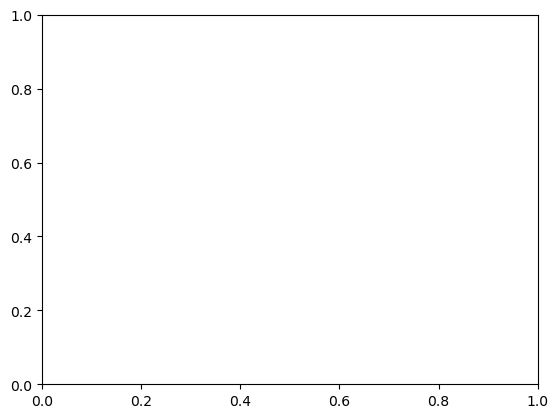

In [37]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plot
from FileAnalize import analize_file, analize_file_uno,analize_file_uno_ceros, save_file, load_file
from funciones import *
from datetime import datetime
import numpy as np
import pandas as pd
from collections import Counter
import pathlib
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#edades = [12, 15, 13, 12, 18, 20, 19, 20, 13, 12, 13, 17, 15, 16, 13, 14, 13, 17, 19]
write_layer=[2,8,10,16,18,24,30,36,38,44,49,53]

diff_inp_output=[]
razon=[]
capa=[]
numero=[]
max_value_inp = []
mean_inp = []
min_value_inp = []
max_value_out = []
mean_out = []
min_value_out = []
ratio_input = []
ratio_output = []

bit=[]
frec=[]
count=0
    
for i,j in enumerate(write_layer):
   
    
    print('Capa',j,NetOriginal.layers[j].__class__.__name__)
    capa.append(NetOriginal.layers[j].__class__.__name__)
    numero.append(j)
    X = next(iter(test_dataset))[0]
    out= get_all_outputs(NetOriginal,X)
    out_quantizacion = out[j-1]
    print(out_quantizacion.shape)
    out_error_and_correction = out[j]
    cociente=tf.math.divide(tf.math.abs(out_quantizacion),tf.math.abs(out_error_and_correction))  
    a=tf.reshape(cociente, [154587 , 1]).numpy()


    print(a)
  
    for i, j in enumerate(a):
        c=[]     
        h=tf.data.experimental.Counter(j)
        print('h',h) 
        c.append(h)
        #count= count+1
        #if count==num_fallos
        print('c',c)
        print(len(c))
        
        
        # los elementos que mas se repiten 
        #print('los elementos que mas se repiten',h.most_common(3))
    
        a=Counter(c)
        print(a)
        for i in a:
            bit.append(i)
            frec.append(a[i])
    
    
        print('bit',bit)
        print('frec',frec)
        print(graficar(bit,frec,j))
        del c
        
        
        plot.show() #dibujamos el hist

In [ ]:
## Creo la red con el experimento de redondeo

In [ ]:
x001xxxxx100xxxx          x001xxxxx100xxxx         
0000111111111111          0000000000001000
0000111111001111          0000000000001000

0b0000011110100010
0b0000000000001111
  0000000000000010
    
0b00100011110010010   
0b00000111111111111


0b00001111_11111111
0b11111111_11110000
  
xxx0xxxxxxx0xxxx
0000000000001111
0000000000001111

xxx0xxxxxxx1xxxx
0000000000001111
0000000000001111

xx101xxxxx101xxx
0000000000001111
0000000000001111

xx100xxxxx110xxx
0000000000001111
0000000000000111





In [5]:
bin(4107      )

'0b1000000001011'

In [12]:
int('0000000000000111',2)

7

In [1]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Stats import WeightQuantization, IntroduceFaultsInWeights, GenerateFaultsList
from Training import GetDatasets
from Simulation import get_all_outputs
from Simulation import buffer_simulation, save_obj, load_obj
from funciones import compilNet, same_elements
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import tensorflow_datasets as tfds

trainBatchSize = testBatchSize = 1
_,_,test_dataset = GetDatasets('colorectal_histology',(80,5,15),(227,227), 8, trainBatchSize, testBatchSize)

word_size  = 16
afrac_size = 11  
aint_size  = 4
wfrac_size = 11
wint_size  = 4


cwd = os.getcwd()
wgt_dir = os.path.join(cwd, 'Data')
wgt_dir = os.path.join(wgt_dir, 'Trained Weights')
wgt_dir = os.path.join(wgt_dir, 'AlexNet')
wgt_dir = os.path.join(wgt_dir, 'Colorectal Dataset')
wgt_dir = os.path.join(wgt_dir,'Weights')

Cargar_errores = True



if Cargar_errores:
    locs  = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/locs_054')
    error_mask = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/error_mask_054')

<function FuncionRound at 0x000001F9CC850C10>


In [4]:
from Nets import GetNeuralNetworkModel



Net2 = GetNeuralNetworkModel('AlexNet', (227,227,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                                 aging_active=True, word_size=word_size, frac_size=afrac_size, 
                                 batch_size = testBatchSize)
Net2.load_weights(wgt_dir).expect_partial()
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
Net2.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
loss_s,acc_s  = Net2.evaluate(test_dataset)
loss = tf.keras.losses.CategoricalCrossentropy()



AlexNet
ValuesFirstBits Tensor("lambda_27/GatherNd_3:0", shape=(None,), dtype=int32)
ValuesToInvert Tensor("lambda_27/GatherNd_4:0", shape=(None,), dtype=int32)
ValuesInvert Tensor("lambda_27/Invert:0", shape=(None,), dtype=int32)
index_change Tensor("lambda_27/Where_5:0", shape=(None, 1), dtype=int64)
v_m Tensor("lambda_27/TensorScatterUpdate:0", shape=(None,), dtype=int32)
tamaño de valores afectados Tensor("lambda_27/Size_1:0", shape=(), dtype=int32)
aging_active[0] True
ValuesFirstBits Tensor("lambda_30/GatherNd_3:0", shape=(None,), dtype=int32)
ValuesToInvert Tensor("lambda_30/GatherNd_4:0", shape=(None,), dtype=int32)
ValuesInvert Tensor("lambda_30/Invert:0", shape=(None,), dtype=int32)
index_change Tensor("lambda_30/Where_5:0", shape=(None, 1), dtype=int64)
v_m Tensor("lambda_30/TensorScatterUpdate:0", shape=(None,), dtype=int32)
tamaño de valores afectados Tensor("lambda_30/Size_1:0", shape=(), dtype=int32)
AddCustomLayers
aging_active[1] True
ValuesFirstBits Tensor("lambda_31/

ValuesFirstBits Tensor("model_13/lambda_45/GatherNd_3:0", shape=(None,), dtype=int32)
ValuesToInvert Tensor("model_13/lambda_45/GatherNd_4:0", shape=(None,), dtype=int32)
ValuesInvert Tensor("model_13/lambda_45/Invert:0", shape=(None,), dtype=int32)
index_change Tensor("model_13/lambda_45/Where_5:0", shape=(None, 1), dtype=int64)
v_m Tensor("model_13/lambda_45/TensorScatterUpdate:0", shape=(None,), dtype=int32)
tamaño de valores afectados Tensor("model_13/lambda_45/Size_1:0", shape=(), dtype=int32)
ValuesFirstBits Tensor("model_13/lambda_27/GatherNd_3:0", shape=(None,), dtype=int32)
ValuesToInvert Tensor("model_13/lambda_27/GatherNd_4:0", shape=(None,), dtype=int32)
ValuesInvert Tensor("model_13/lambda_27/Invert:0", shape=(None,), dtype=int32)
index_change Tensor("model_13/lambda_27/Where_5:0", shape=(None, 1), dtype=int64)
v_m Tensor("model_13/lambda_27/TensorScatterUpdate:0", shape=(None,), dtype=int32)
tamaño de valores afectados Tensor("model_13/lambda_27/Size_1:0", shape=(), dtype

Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 33864 888 1024]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 235
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3583 383 0 ... 33791 4848 4096]
mask del for [16384 16384 16384 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [0 0 0 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 34175 32768 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 32768 1535 0]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4095 3455 33535 .

mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 1023 32768]
mask del for [64 16384 64 ... 64 128 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [34112 0 1280 ... 2431 1024 32768]
 14/750 [..............................] - ETA: 1:35 - loss: 2.6442 - accuracy: 0.3571mask del for [64 64 16384 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1279 1151 0 ... 0 959 1014]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 0 33068]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256

mask del for [16384 64 2 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 384 1816 ... 0 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34112 4735 ... 32768 34048 32768]
mask del for [64 16384 64 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33856 32768 33024 ... 33886 33792 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3583 4479 34175 ... 768 32768 32768]
 20/750 [..............................] - ETA: 1:33 - loss: 3.2788 - accuracy: 0.3000mask del for [64 64 64 ... 2 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1023 1535 895 ... 803 0 1024]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 .

mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 237
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 16384 16384 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [2815 0 0 ... 866 511 32768]
mask del for [16384 64 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [32768 33280 0 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 767 ... 32768 34048 32768]
mask del for [64 16384 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1151 0 33792 ... 33792 511 32768]
mask del for [64 64 16384 ... 64 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [7935 3327 0 ... 33023 32768 32768]
 26/750 [>.............................] - ETA: 1:32 - loss: 2.6071 - accuracy: 0.4231m

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 4 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2008 33792]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 239
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2047 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [2240 2303 0 ... 1535 0 32768]
mask del for [16384 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [32768 1664 0 ... 0 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [5759 34175 32768 ... 32768 34048 0]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits 

newValues despues de ValuesFirstBits  [6655 3967 3967 ... 2048 34095 32768]
 37/750 [>.............................] - ETA: 1:31 - loss: 2.5728 - accuracy: 0.4324mask del for [64 64 64 ... 2 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1151 1216 1151 ... 643 0 816]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 32768 32768 33280]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 237
newValues despues de ValuesFirstBits  [33279 33279 33216 ... 33280 335 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 33
newValues despues de ValuesFirstBits  [2559 320 0 ... 3072 33279 32768]
mask del for [16384 64 512 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirst

Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 32895 383 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 0 ... 33792 33279 32768]
mask del for [64 64 64 ... 128 512 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2687 4607 1023 ... 768 2047 32768]
 43/750 [>.............................] - ETA: 1:30 - loss: 2.6033 - accuracy: 0.3953mask del for [64 16384 64 ... 2 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 0 1920 ... 1927 0 1952]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 4 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 3616 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newVa

mask del for [64 16384 2 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1791 0 4616 ... 1023 2559 32768]
mask del for [64 16384 16384 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1151 0 0 ... 0 1664 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [4607 2047 34175 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 0 ... 33792 1023 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1535 3583 34175 ... 33024 3359 32768]
 49/750 [>.............................] - ETA: 1:29 - loss: 2.7557 - accuracy: 0.3673mask del for [64 16384 64 ... 16384 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 0 1920 ... 0 0 1952]
mask del for [1638

mask del for [16384 64 512 ... 1024 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 2048 512 3058]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 16384 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4032 0 5888 ... 3584 1023 32768]
mask del for [16384 64 2 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [32768 512 2668 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 5247 ... 32768 34048 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33886 33792 32768]
mask del for [64 16384 512 ... 128 2 16384]
Cantidad de valores afectados 11
newValues 

mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [33407 383 32768 ... 33792 33279 32768]
mask del for [64 16384 64 ... 0 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1791 0 33024 ... 33937 1415 32768]
 66/750 [=>............................] - ETA: 1:27 - loss: 2.5603 - accuracy: 0.4545mask del for [64 64 16384 ... 2 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1407 1535 0 ... 911 0 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2048 34078]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 256 1 2

mask del for [16384 512 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 3072 0 ... 32768 0 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 1279 2559 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 511 32768]
mask del for [64 64 64 ... 16384 128 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4032 5119 33023 ... 32768 4351 0]
 72/750 [=>............................] - ETA: 1:26 - loss: 2.5199 - accuracy: 0.4583mask del for [16384 64 2 ... 16384 512 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1152 868 ... 0 1024 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64

mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 238
newValues despues de ValuesFirstBits  [33279 33279 33216 ... 33280 2879 32768]
mask del for [64 64 16384 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4351 3904 0 ... 4594 2559 0]
mask del for [16384 512 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [32768 1024 0 ... 0 0 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 34112 5887 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 2048 ... 33792 511 32768]
mask del for [64 64 16384 ... 0 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [767 34175 0 ... 33776 0 32768]
 78/750 [==>...........................] - ETA: 1:25 - loss: 2.4604 - accuracy: 0.4744mask del for 

newValues despues de ValuesFirstBits  [1279 383 0 ... 0 639 344]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 256]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 32768 32768]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 229
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 256 256 8]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [7551 34047 576 ... 5120 4095 11759]
mask del for [16384 64 512 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [0 2560 0 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [16384 64 512 ... 1 256 2048]
Ca

mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [5247 2815 34175 ... 2048 2048 32768]
 89/750 [==>...........................] - ETA: 1:23 - loss: 2.5217 - accuracy: 0.4719mask del for [64 64 16384 ... 64 16384 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1791 1407 0 ... 1919 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3640 2480 3072]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33023 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3392 4223 0 ... 10751 1536 32768]
mask del for [64 16384 2 ... 16384

mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 639 ... 32768 34048 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33023 1919 32768 ... 33792 2559 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6527 3839 34175 ... 2048 34095 32768]
 95/750 [==>...........................] - ETA: 1:22 - loss: 2.5279 - accuracy: 0.4842mask del for [64 64 16384 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1535 1663 0 ... 0 1471 1536]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2048 1460]
mask del for [64 64 64 ... 256 4

mask del for [64 64 16384 ... 256 1 2048]
Cantidad de valores afectados 28
newValues despues de ValuesFirstBits  [1279 35455 0 ... 1024 1110 4096]
mask del for [16384 16384 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [32768 0 32768 ... 32768 0 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [0 34048 32768 ... 33886 33792 32768]
mask del for [64 64 16384 ... 64 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2943 5631 0 ... 1535 33839 32768]
101/750 [===>..........................] - ETA: 1:21 - loss: 2.3966 - accuracy: 0.5149mask del for [64 64 16384 ... 512 8192 32]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [960 1535 0 ... 0 0 191]
mask del fo

mask del for [16384 64 512 ... 512 1024 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 0 1536]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2047 32768]
mask del for [64 64 16384 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [2815 511 0 ... 3018 33279 32768]
mask del for [64 16384 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1279 0 2304 ... 0 3328 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 4223 ... 32768 33664 32768]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 14 32768]
mask del for [64 64 64 ... 128 512 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFir

mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 1024 ... 33792 98 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1279 6527 4032 ... 2559 0 32768]
118/750 [===>..........................] - ETA: 1:20 - loss: 2.4494 - accuracy: 0.5000mask del for [64 64 16384 ... 512 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 1407 0 ... 1024 0 920]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 4 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 1272 512]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 235
newValues despues de ValuesFirstBits  [33279 33216 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 1 204

mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1919 34815 32768 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34112 34175 255 ... 32768 34048 32768]
mask del for [64 16384 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33279 32768 33792 ... 33792 2596 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6399 3967 34175 ... 1535 34095 32768]
124/750 [===>..........................] - ETA: 1:19 - loss: 2.4403 - accuracy: 0.5000mask del for [64 16384 64 ... 64 16384 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 0 1664 ... 1920 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [1638

mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 240
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 16384 512 ... 1 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [2559 32768 32768 ... 2772 1023 0]
mask del for [64 16384 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [2559 0 128 ... 32768 33920 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [34175 34175 32768 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 204 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1407 3327 34175 ... 256 2048 32768]
130/750 [====>.........................] - ETA: 1:19 - loss: 2.4720 - accuracy: 0.4

newValues despues de ValuesFirstBits  [1791 1791 1984 ... 1995 0 1791]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 4 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 3624 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 235
newValues despues de ValuesFirstBits  [33279 33279 33216 ... 33280 4095 32768]
mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4095 3199 1407 ... 2048 1122 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 33792 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34112 34175 127 ... 32768 34048 32768]
mask del for [64 16384 64 ... 1 256 2

mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [7039 34175 0 ... 255 0 32768]
141/750 [====>.........................] - ETA: 1:17 - loss: 2.5431 - accuracy: 0.4681mask del for [16384 64 16384 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1152 0 ... 0 1727 1024]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 368
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 32768 2560 33792]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 1 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [4991 3711 34303 ... 6466 3208 32768]
mask del for [64 16384 512 ... 163

mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [64 16384 64 ... 1 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [320 32768 34048 ... 33886 33792 32768]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3071 33663 0 ... 1536 0 32768]
147/750 [====>.........................] - ETA: 1:17 - loss: 2.4990 - accuracy: 0.4830mask del for [64 64 16384 ... 16384 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1663 1407 0 ... 0 0 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 33222 33280]
mask del for [64 64 64 ... 256 1024 

mask del for [64 64 64 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1600 255 895 ... 5548 7679 12288]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1791 0 1024 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 1791 34175 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 512 32832 0]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1791 2752 0 ... 34048 0 32768]
153/750 [=====>........................] - ETA: 1:16 - loss: 2.5464 - accuracy: 0.4902mask del for [64 64 64 ... 2 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [639 895 767 ... 687 0 512]
mask del for [16384

mask del for [16384 64 512 ... 512 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2560 3072]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 16384 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3199 0 3072 ... 7167 2048 32768]
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1663 34815 32768 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 42
newValues despues de ValuesFirstBits  [34175 34175 33791 ... 32768 34048 32768]
mask del for [16384 512 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 33792 0 ... 33792 2559 32768]
mask del for [64 64 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newVal

mask del for [64 64 16384 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33919 33279 0 ... 33792 1704 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [9087 2943 34175 ... 767 34095 32768]
170/750 [=====>........................] - ETA: 1:14 - loss: 2.5545 - accuracy: 0.4824mask del for [64 64 16384 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1279 1023 0 ... 0 767 448]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 33280 392]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2047 32768]
mask del for [64 64 16384 ... 1 256 2048]

mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1919 34815 32768 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 639 ... 32768 34048 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33279 1663 32768 ... 33792 2559 32768]
mask del for [64 64 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3967 34175 32768 ... 1791 34095 32768]
176/750 [======>.......................] - ETA: 1:13 - loss: 2.6770 - accuracy: 0.4773mask del for [64 64 16384 ... 2 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [511 320 0 ... 1591 0 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [163

mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 238
newValues despues de ValuesFirstBits  [33279 33279 33216 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [34559 3711 0 ... 33791 1164 0]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34047 32768 1792 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [895 1663 1919 ... 0 34048 32768]
mask del for [16384 512 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 33792 32768 ... 33792 511 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [7295 6911 34175 ... 8448 32768 0]
182/750 [======>.......................] - ETA: 1:12 - loss: 2.6856 - accuracy: 0.4780

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 32768 512 312]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [3711 33919 7679 ... 2560 4348 32768]
mask del for [16384 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [0 6400 0 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 1663 3839 ... 32768 34048 0]
mask del for [16384 64 512 ... 1 1 2048]
Cantidad de valores afectados 33
newValues despues de ValuesFirstBits

newValues despues de ValuesFirstBits  [3967 34175 32768 ... 2048 34095 32768]
193/750 [======>.......................] - ETA: 1:11 - loss: 2.6206 - accuracy: 0.4715mask del for [64 64 16384 ... 2 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1535 2047 0 ... 655 0 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 363
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 1 256]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 33034 32768]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2047 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3967 4223 0 ... 4608 3071 32768]
mask del for [64 16384 512 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFir

Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [33663 3967 32768 ... 32768 32768 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33886 32768 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6527 6143 767 ... 768 1351 32768]
199/750 [======>.......................] - ETA: 1:10 - loss: 2.6879 - accuracy: 0.4673mask del for [16384 64 2 ... 2 8192 32]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1920 1932 ... 1911 0 1919]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2560 3072]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 231
new

mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [2175 7167 2303 ... 4608 1060 32768]
mask del for [16384 64 2 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [32768 33536 33568 ... 32768 0 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 4479 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 32768 ... 33792 32774 32768]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2815 34175 0 ... 0 0 32768]
205/750 [=======>......................] - ETA: 1:09 - loss: 2.6949 - accuracy: 0.4634mask del for [64 64 64 ... 16384 512 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1535 1151 448 ... 0 1024 0]
mask del for 

mask del for [16384 64 512 ... 4 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 34216 34304 33558]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 231
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 1 1]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [2815 2047 0 ... 15871 2332 2198]
mask del for [16384 64 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 5248 32768 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 32768 ... 32768 34048 32768]
mask del for [64 16384 64 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33344 32768 34048 ... 33886 33280 32768]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValue

mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [33919 32768 34048 ... 33792 2198 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [511 2943 34175 ... 4608 34095 0]
222/750 [=======>......................] - ETA: 1:07 - loss: 2.6126 - accuracy: 0.4685mask del for [64 64 64 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1151 1791 1407 ... 0 767 826]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 368
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 32768 33256 32768]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 232
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 16384 64 ... 1 1 2

Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [511 32768 0 ... 0 0 32768]
mask del for [64 64 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 5759 34175 ... 32768 32768 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 0 ... 33886 33280 32768]
mask del for [64 64 64 ... 128 2 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [33407 3455 34175 ... 1792 3211 32768]
228/750 [========>.....................] - ETA: 1:06 - loss: 2.6314 - accuracy: 0.4693mask del for [64 16384 512 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1279 0 1024 ... 0 319 262]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 368
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 256]
Cantidad de valores afectados 39

Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 16384 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3264 0 0 ... 7167 2047 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 639 ... 32768 34048 32768]
mask del for [64 16384 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33279 32768 33792 ... 33792 2559 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6527 3967 34175 ... 1792 34095 32768]
234/750 [========>.....................] - ETA: 1:05 - loss: 2.6984 - accuracy: 0.4701mask del for [64 16384 64 ... 64

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3576 3000 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 16384 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1216 4095 0 ... 2090 2048 32768]
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1919 34815 32768 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 2559 ... 32768 34048 32768]
mask del for [16384 512 16384 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFi

Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6527 34175 32768 ... 34047 34095 32768]
245/750 [========>.....................] - ETA: 1:03 - loss: 2.6792 - accuracy: 0.4776mask del for [64 64 16384 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [639 1279 0 ... 0 767 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 364
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 2048 33792 33718]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 235
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 6463 32768]
mask del for [64 64 16384 ... 1 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [2815 1023 0 ... 2842 1030 32768]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 4

Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 32768 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 33664 33792 ... 33792 33279 32768]
mask del for [64 16384 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [34175 32768 1664 ... 3071 0 32768]
251/750 [=========>....................] - ETA: 1:03 - loss: 2.6611 - accuracy: 0.4781mask del for [64 64 64 ... 16384 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [639 1023 639 ... 0 0 1024]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 32768 33560]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afecta

mask del for [64 64 16384 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3327 2815 0 ... 1286 1535 32768]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 0 2176 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [34175 34175 3839 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 172 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3455 5119 2559 ... 2048 0 32768]
257/750 [=========>....................] - ETA: 1:02 - loss: 2.6658 - accuracy: 0.4786mask del for [64 64 16384 ... 2 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1663 767 0 ... 875 0 1536]
mask del for [1

newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3576 2916 3072]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4800 3455 895 ... 4054 1023 32768]
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [2431 34752 32768 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 42
newValues despues de ValuesFirstBits  [34175 34175 0 ... 32768 34048 32768]
mask del for [64 64 64 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [320 1407 383 ... 33886 33792 32768]
mask del for [64 64 16384 ... 64 4 16384]

268/750 [=========>....................] - ETA: 1:01 - loss: 2.7201 - accuracy: 0.4701mask del for [64 64 64 ... 16384 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [895 767 1791 ... 0 0 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1 512 1024]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 43 0 0]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 238
newValues despues de ValuesFirstBits  [33279 2815 33279 ... 5120 2047 32768]
mask del for [64 16384 512 ... 256 256 256]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3839 32768 0 ... 1023 2048 2559]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [511 32768 1024 ... 32768 0 0]
mask del for [64 64 16384 ... 16384 16384 163

mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [0 33280 33792 ... 33792 2047 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6527 2687 34175 ... 2048 34095 32768]
274/750 [=========>....................] - ETA: 1:00 - loss: 2.6986 - accuracy: 0.4708mask del for [64 16384 64 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1023 0 1536 ... 0 703 910]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 1814 34304]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2047 32768]
mask del for [64 16384 64 ... 1 1 204

Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [2815 0 8192 ... 32768 0 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [33663 34175 32768 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 1535 32768]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [5759 2431 0 ... 2048 0 32768]
280/750 [==========>...................] - ETA: 59s - loss: 2.6853 - accuracy: 0.4643mask del for [64 64 64 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [639 1023 1279 ... 0 383 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 1 256]
Cantidad de valores afectados 3

Cantidad de valores afectados 235
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 302 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 35
newValues despues de ValuesFirstBits  [7423 8831 0 ... 4608 6655 4096]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [639 32768 34816 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 37
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [64 64 16384 ... 1 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [1919 3711 32768 ... 33180 32872 32768]
mask del for [64 64 64 ... 0 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4351 1535 3071 ... 33217 32768 0]
286/750 [==========>...................] - ETA: 59s - loss: 2.6427 - accuracy: 0.4685mask del for [64 64 64 ... 16384 512 8192]
C

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2048 2048]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33216 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3455 2559 255 ... 4096 5631 32768]
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [4479 33663 32768 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 32768]
mask del for [64 16384 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de Valu

Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2815 3455 34175 ... 2047 3328 32768]
297/750 [==========>...................] - ETA: 57s - loss: 2.5909 - accuracy: 0.4747mask del for [64 64 16384 ... 16384 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1535 639 0 ... 0 0 1536]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 32768 0 0]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 235
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2575 32768]
mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [2431 0 3328 ... 2560 33916 32768]
mask del for [16384 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 39
ne

Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [2175 7039 34175 ... 32768 34048 32768]
mask del for [64 16384 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [64 32768 34048 ... 33792 511 0]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2943 1023 34175 ... 34048 0 0]
303/750 [===========>..................] - ETA: 56s - loss: 2.6401 - accuracy: 0.4752mask del for [64 64 16384 ... 16384 8192 32]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1279 2047 0 ... 0 0 1279]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 4 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 1496 32768]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 237
newValues despu

Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3455 1279 0 ... 32872 33478 8192]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [2559 32768 2816 ... 0 0 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 42
newValues despues de ValuesFirstBits  [34175 34175 767 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [0 34048 0 ... 33792 511 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3327 2303 34175 ... 2560 0 32768]
309/750 [===========>..................] - ETA: 56s - loss: 2.6327 - accuracy: 0.4757mask del for [16384 64 16384 ... 64 16384 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 896 0 ... 512 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores af

Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [0 0 32768 ... 6144 1544 34304]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 239
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 8192 33280 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [0 0 6144 ... 8960 7167 4096]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [767 0 1024 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [16384 64 512 ... 256 256 8]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 33279 2735]
mask del for [64 16384 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [5631 0 0 ... 330

mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33856 32768 34048 ... 33792 176 32768]
mask del for [64 64 16384 ... 128 128 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3199 34175 0 ... 2559 32768 32768]
326/750 [============>.................] - ETA: 53s - loss: 2.5377 - accuracy: 0.4877mask del for [16384 64 2 ... 16384 8192 32]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1920 1952 ... 0 0 1919]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3496 2918 3034]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 16384 ... 1 1 20

mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 1919 ... 32768 34048 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [639 33151 32768 ... 33792 511 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3199 3967 34175 ... 512 34095 32768]
332/750 [============>.................] - ETA: 53s - loss: 2.5361 - accuracy: 0.4849mask del for [64 64 16384 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1407 1535 0 ... 0 1343 1500]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 

mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 238
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 33111 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [2880 35071 32768 ... 33791 5632 12288]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34815 0 32768 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1151 1791 1279 ... 32768 34048 0]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33886 33792 32768]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4223 1023 0 ... 1023 0 0]
338/750 [============>.................] - ETA: 52s - loss: 2.5383 - accuracy: 0.482

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1 512 4]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 43 0 3624]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4095 1279 4223 ... 2048 1023 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 0 ... 32768 34048 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBit

Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4095 34175 32768 ... 34047 34095 32768]
349/750 [============>.................] - ETA: 51s - loss: 2.6122 - accuracy: 0.4785mask del for [16384 64 16384 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1792 0 ... 0 1855 1978]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 43 0 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 232
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4160 3327 4223 ... 7167 2048 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 3

Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 32768 ... 0 32768 32768]
mask del for [16384 64 512 ... 1 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 0 ... 33886 33272 32768]
mask del for [64 64 64 ... 0 512 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [33279 4351 4479 ... 34073 2047 32768]
355/750 [=============>................] - ETA: 50s - loss: 2.5934 - accuracy: 0.4704mask del for [64 64 64 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 1919 1984 ... 0 319 318]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 368
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 256]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [0 0 32768 ... 2048 35840 34816]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 239
newV

mask del for [64 16384 2 ... 1 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3264 0 4080 ... 2460 1156 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 0 ... 32768 34048 32768]
mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32895 32768 33792 ... 33792 2656 32768]
mask del for [64 64 16384 ... 64 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3583 34175 32768 ... 34047 34095 32768]
361/750 [=============>................] - ETA: 49s - loss: 2.5768 - accuracy: 0.4737mask del for [64 64 64 ... 16384 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 1279 1919 ... 0 0 1536]
mask

mask del for [16384 64 512 ... 4 1 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 2040 1328 2506]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 235
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [2303 3839 3071 ... 11263 686 32768]
mask del for [16384 512 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [32768 32768 0 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1023 1023 33407 ... 33792 1535 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despue

mask del for [16384 64 2 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33484 ... 33792 33791 32768]
mask del for [64 16384 512 ... 128 2 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [34175 0 2048 ... 33024 3571 32768]
378/750 [==============>...............] - ETA: 47s - loss: 2.5807 - accuracy: 0.4762mask del for [64 16384 64 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 0 1920 ... 0 1983 1948]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3600 2974 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 16384 ... 1 

mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 0 1152 ... 32768 0 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 42
newValues despues de ValuesFirstBits  [34175 34175 33279 ... 32768 34048 32768]
mask del for [64 16384 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [34047 32768 33792 ... 33792 34303 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6143 5312 2303 ... 256 34095 32768]
384/750 [==============>...............] - ETA: 46s - loss: 2.5686 - accuracy: 0.4766mask del for [64 64 16384 ... 2 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1279 1919 0 ... 975 0 440]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 .

mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [16384 64 2 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [32768 512 5064 ... 5120 1535 4096]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 0 2432 ... 32768 32768 32768]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [2047 1151 32768 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 1616 0]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [7935 3839 4479 ... 3072 32768 0]
390/750 [==============>...............] - ETA: 45s - loss: 2.5505 - accuracy: 0.

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3640 2976 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4095 1279 4095 ... 2048 1138 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 576 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFi

Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2368 383 34175 ... 34048 34095 0]
401/750 [===============>..............] - ETA: 44s - loss: 2.5869 - accuracy: 0.4788mask del for [64 16384 512 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [895 0 1024 ... 0 1407 1336]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 2048 0 312]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 1 1 8]
Cantidad de valores afectados 30
newValues despues de ValuesFirstBits  [511 32895 511 ... 3451 280 2751]
mask del for [16384 64 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues d

Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 32895 ... 32768 34048 32768]
mask del for [64 64 16384 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [895 895 32768 ... 33886 33792 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6015 3967 34175 ... 33280 34095 32768]
407/750 [===============>..............] - ETA: 43s - loss: 2.5806 - accuracy: 0.4791mask del for [64 64 16384 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1279 511 0 ... 0 831 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 0 33792]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 237
newValu

Cantidad de valores afectados 29
newValues despues de ValuesFirstBits  [4607 1088 1151 ... 3072 33279 32768]
mask del for [64 16384 512 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [33407 32768 2048 ... 32768 768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [1023 34175 34175 ... 32768 1280 32768]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 1614 32768]
mask del for [64 64 16384 ... 128 512 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6143 34175 0 ... 3072 2047 32768]
413/750 [===============>..............] - ETA: 42s - loss: 2.5694 - accuracy: 0.4818mask del for [16384 64 2 ... 16384 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1920 1944 ... 0 0 1940]
mask del for [16384 64 512 ... 0 16384 16384]
C

mask del for [16384 64 512 ... 1 512 1024]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 43 0 2048]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 30
newValues despues de ValuesFirstBits  [2687 9727 0 ... 6143 512 32768]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [4223 32768 33152 ... 32768 0 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 4223 ... 32768 34048 0]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 1023 32768]
mask del for [64 64 16384 ... 64 1024 16384]
Cantidad de valores afectados 11
newValues des

mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32832 32768 34048 ... 33792 33284 32768]
mask del for [16384 16384 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [0 0 32768 ... 767 32768 32768]
430/750 [================>.............] - ETA: 40s - loss: 2.5605 - accuracy: 0.4791mask del for [64 64 64 ... 2 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1728 1023 895 ... 1731 0 1536]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2048 1898]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 238
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 64 ... 2

mask del for [16384 64 512 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [0 2176 2048 ... 32768 32768 32768]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [33919 34175 32768 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 33791 32768]
mask del for [64 16384 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [895 0 32768 ... 1536 32768 0]
436/750 [================>.............] - ETA: 39s - loss: 2.5993 - accuracy: 0.4794mask del for [16384 64 512 ... 16384 8192 32]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1792 0 ... 0 0 575]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 369
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for 

mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 6143 32768]
mask del for [64 16384 64 ... 1 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [3199 0 7040 ... 8632 1535 32768]
mask del for [64 16384 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [2431 0 0 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 2048 ... 33792 511 32768]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4479 34175 32768 ... 34048 2048 32768]
442/750 [================>.............] - ETA: 39s - loss: 2.5900 - accur

newValues despues de ValuesFirstBits  [895 0 712 ... 0 999 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 34296 34304 386]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 231
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 256 8]
Cantidad de valores afectados 30
newValues despues de ValuesFirstBits  [33088 4095 0 ... 1023 33791 3807]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [3839 0 0 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [2559 1535 4991 ... 32768 34048 0]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad d

mask del for [64 16384 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [34175 0 32768 ... 8447 34095 0]
453/750 [=================>............] - ETA: 37s - loss: 2.6201 - accuracy: 0.4768mask del for [16384 64 2 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1920 1960 ... 0 1983 1968]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3648 2976 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4223 1279 4095 ... 2048 1150 32768]
mask del for [64 16384 512 ... 16384 16384 

mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [33663 34175 5247 ... 32768 34048 32768]
mask del for [64 16384 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33791 0 34048 ... 33792 1023 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1791 1407 2047 ... 1024 0 32768]
459/750 [=================>............] - ETA: 37s - loss: 2.6393 - accuracy: 0.4749mask del for [16384 64 2 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1920 1960 ... 0 1983 1976]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3672 3032 3072]
mask del for [64 64 64 ... 256 1024 1024

mask del for [64 64 64 ... 256 256 256]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [5631 6527 35455 ... 33791 5120 9215]
mask del for [16384 64 2 ... 16384 16384 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [0 33024 748 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 37
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [64 64 16384 ... 1 256 2048]
Cantidad de valores afectados 33
newValues despues de ValuesFirstBits  [1663 3711 32768 ... 33886 34303 32768]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1279 33279 0 ... 34048 0 32768]
465/750 [=================>............] - ETA: 36s - loss: 2.6350 - accuracy: 0.4774mask del for [64 64 64 ... 16384 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1279 1600 1663 ... 0 0 512]
mask del for

mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3624 3024 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3264 1279 4223 ... 2047 2048 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34112 34175 2559 ... 32768 34048 32768]
mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1535 32768 33536 ... 33792 2604 32768]
mask del for [64 64 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues d

mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 33536 33792 ... 33792 2638 32768]
mask del for [64 64 64 ... 64 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3839 3967 34175 ... 34047 34095 32768]
482/750 [==================>...........] - ETA: 34s - loss: 2.6464 - accuracy: 0.4730mask del for [64 64 64 ... 16384 512 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1151 1663 1535 ... 0 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 368
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 35638 34816]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 247
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 16384 64 ... 25

mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [33407 32768 1152 ... 32768 32768 32768]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [9087 34175 32768 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 34303 32768]
mask del for [64 64 16384 ... 64 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1919 34175 0 ... 1919 1511 32768]
488/750 [==================>...........] - ETA: 33s - loss: 2.6185 - accuracy: 0.4754mask del for [64 64 16384 ... 64 16384 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1728 895 0 ... 767 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for

mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 237
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 6143 32768]
mask del for [64 16384 2 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3711 0 2660 ... 3584 511 32768]
mask del for [64 16384 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [255 0 2304 ... 0 1280 0]
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [33663 34175 32768 ... 32768 32768 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 1023 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4607 2303 33023 ... 1536 34095 32768]
494/750 [==================>...........] - ETA: 32s - loss: 2.5997 - accuracy: 0.4737m

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1 512 1024]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 43 0 32768]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4823 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3839 2943 0 ... 18943 4096 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1407 0 1024 ... 32768 0 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 32768]
mask del for [16384 64 2 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [327

newValues despues de ValuesFirstBits  [2752 1535 4991 ... 5888 1519 32768]
505/750 [===================>..........] - ETA: 31s - loss: 2.6032 - accuracy: 0.4693mask del for [64 64 16384 ... 2 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [895 767 0 ... 1655 0 922]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 1848 1024 0]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 237
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2047 32768]
mask del for [64 64 16384 ... 256 256 8]
Cantidad de valores afectados 34
newValues despues de ValuesFirstBits  [1535 4735 0 ... 5631 33791 11519]
mask del for [64 16384 512 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [127

newValues despues de ValuesFirstBits  [4223 2047 34175 ... 32768 34048 0]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 1535 32768]
mask del for [64 64 64 ... 128 512 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [33279 4223 34175 ... 6656 2047 32768]
511/750 [===================>..........] - ETA: 30s - loss: 2.6161 - accuracy: 0.4677mask del for [64 64 16384 ... 16384 512 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [511 1023 0 ... 0 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1 512 4]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [0 0 32768 ... 43 3072 34248]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  

newValues despues de ValuesFirstBits  [4607 5247 0 ... 3584 2228 32768]
mask del for [16384 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [32768 2688 0 ... 0 0 0]
mask del for [64 64 64 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 34175 1279 ... 32768 32768 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 0 ... 33792 33791 32768]
mask del for [64 64 64 ... 0 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [5119 3071 34175 ... 33010 1263 32768]
517/750 [===================>..........] - ETA: 29s - loss: 2.6199 - accuracy: 0.4642mask del for [16384 64 2 ... 16384 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1920 1960 ... 0 0 1936]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues des

newValues despues de ValuesFirstBits  [0 0 32768 ... 0 1160 2048]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2511 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [6015 3520 3583 ... 4095 2559 32768]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [2687 32768 3328 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [33663 34175 32768 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [0 34048 33792 ... 33792 34303 32768]
mask del for [64 16384 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3455 0 2048 ... 1024 32768 32768]
523/750 [===

newValues despues de ValuesFirstBits  [1919 1919 0 ... 1024 0 1024]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 16384 1 512]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 43 0]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4928 33919 0 ... 3584 1023 32768]
mask del for [64 16384 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 3072 ... 32768 0 0]
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 42
newValues despues de ValuesFirstBits  [34175 34175 32768 ... 32768 32768 32768]
mask del for [64 16384 64 ... 256 256 

mask del for [64 64 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1791 34175 32768 ... 1792 34095 32768]
534/750 [====================>.........] - ETA: 27s - loss: 2.6407 - accuracy: 0.4607mask del for [64 16384 64 ... 2 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 0 1920 ... 1947 0 1944]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2918 3072]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4095 1151 0 ... 2048 1156 32768]
mask del for [64 64 16384 ... 16384 163

mask del for [64 16384 2 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 32768 34456 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 34303 33886 0]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2687 3839 34175 ... 8192 1207 32768]
540/750 [====================>.........] - ETA: 26s - loss: 2.6444 - accuracy: 0.4611mask del for [64 64 64 ... 2 8192 32]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 1919 1535 ... 871 0 639]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 365
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1 512 1024]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 43 0 0]
mask del for [64 64 64 ... 1024 256 1024]


mask del for [64 64 16384 ... 256 256 256]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1279 4160 0 ... 33791 8192 3583]
mask del for [16384 64 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 5504 4096 ... 32768 0 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 1791 ... 32768 34048 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33886 33792 32768]
mask del for [64 64 16384 ... 64 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3455 33151 0 ... 768 34095 32768]
546/750 [====================>.........] - ETA: 25s - loss: 2.6830 - accuracy: 0.4579mask del for [64 64 64 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1663 1663 1600 ... 0 1407 1536]
mask del for [

mask del for [16384 64 512 ... 512 1024 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 0 2834]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 231
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [2687 3455 0 ... 4607 512 32768]
mask del for [64 16384 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1151 32768 0 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 2047 ... 32768 34048 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32895 895 33535 ... 32768 2559 32768]
mask del for [64 64 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues d

mask del for [16384 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 0 ... 33792 33791 32768]
mask del for [64 64 64 ... 64 512 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [5375 3327 34175 ... 34048 2047 32768]
563/750 [=====================>........] - ETA: 23s - loss: 2.7141 - accuracy: 0.4565mask del for [64 64 16384 ... 64 16384 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1088 1279 0 ... 767 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 32768 33754]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2583 32768]
mask del for [64 64 16384 ... 1 2

mask del for [16384 512 16384 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [32768 1024 0 ... 0 1152 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 2048 ... 33886 33792 32768]
mask del for [64 64 64 ... 128 512 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [639 2431 34175 ... 34048 2047 32768]
569/750 [=====================>........] - ETA: 22s - loss: 2.7241 - accuracy: 0.4534mask del for [64 64 64 ... 64 16384 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1919 1919 1535 ... 1920 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 5

mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3199 1279 4095 ... 2047 2048 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 639 ... 32768 34048 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1663 34047 32768 ... 33792 2559 32768]
mask del for [64 16384 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [34175 32768 32768 ... 2048 34095 32768]
575/750 [======================>.......] - ETA: 22s - loss: 2.7237 - a

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 4 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 3648 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 16384 16384 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3264 0 0 ... 2048 1194 32768]
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1919 34815 32768 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 0 ... 32768 34048 32768]
mask del for [64 16384 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstB

Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3199 1407 0 ... 1279 1419 32768]
586/750 [======================>.......] - ETA: 20s - loss: 2.7043 - accuracy: 0.4573mask del for [16384 2 16384 ... 16384 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 712 0 ... 0 0 1536]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 43 0 2560]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 235
newValues despues de ValuesFirstBits  [33279 33279 33216 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [639 639 32768 ... 512 511 8192]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newVa

Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [1151 0 34048 ... 33792 33346 32768]
mask del for [64 64 16384 ... 0 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2303 2175 0 ... 32911 0 32768]
592/750 [======================>.......] - ETA: 20s - loss: 2.6850 - accuracy: 0.4595mask del for [64 64 16384 ... 512 8192 32]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [767 383 0 ... 1024 0 1919]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 256]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 32768 34816]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 235
newValue

Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [767 0 0 ... 33791 2560 32768]
mask del for [16384 512 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 3072 0 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [1279 34175 34175 ... 32768 34048 32768]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 1535 512 32768]
mask del for [64 64 16384 ... 0 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4800 34112 0 ... 32886 0 32768]
598/750 [======================>.......] - ETA: 19s - loss: 2.6756 - accuracy: 0.4582mask del for [64 16384 64 ... 16384 512 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [511 0 1792 ... 0 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de val

Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [0 0 32768 ... 34816 35328 512]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33216 ... 32768 33280 32768]
mask del for [64 16384 64 ... 256 256 2048]
Cantidad de valores afectados 35
newValues despues de ValuesFirstBits  [12671 32767 5247 ... 33791 7168 12288]
mask del for [16384 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [0 5376 0 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [33023 34175 34175 ... 32768 34048 0]
mask del for [64 16384 64 ... 256 256 2048]
Cantidad de valores afectados 33
newValues despues de ValuesFirstBits  [3136 32768 34048 ... 33792 34303 0]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4672 2559 1

mask del for [64 16384 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1279 32768 33536 ... 33792 2559 32768]
mask del for [64 64 64 ... 64 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4095 3071 34175 ... 34047 34095 32768]
615/750 [=======================>......] - ETA: 17s - loss: 2.6542 - accuracy: 0.4618mask del for [64 64 16384 ... 16384 512 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [511 1088 0 ... 0 1024 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 1 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 2320 2978]
mask del for [64 64 64 ... 1024 1 1024]
Cantidad de valores afectados 227
newValues despues de ValuesFirstBits  [33279 33216 33216 ... 32768 788 32768]
mask del for [64 64 16384 ... 256 256 

mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1791 34815 32768 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 511 ... 32768 34048 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33407 895 32768 ... 33792 2559 32768]
mask del for [64 16384 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [34175 32768 33536 ... 1791 34095 32768]
621/750 [=======================>......] - ETA: 16s - loss: 2.6496 - accuracy: 0.4605mask del for [16384 512 16384 ... 16384 512 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1024 0 ... 0 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16

newValues despues de ValuesFirstBits  [0 0 32768 ... 3448 2968 3072]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1216 4095 0 ... 2048 1535 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 255 ... 32768 34048 32768]
mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [34047 32768 640 ... 33792 2272 32768]
mask del for [64 16384 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [34175 32768 32768 ... 2048 34095 32768]
627

mask del for [64 16384 64 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33728 32768 34048 ... 33886 32768 0]
mask del for [64 16384 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [34175 0 256 ... 6144 0 32768]
638/750 [========================>.....] - ETA: 14s - loss: 2.6028 - accuracy: 0.4655mask del for [64 16384 64 ... 512 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1407 0 1408 ... 0 0 942]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 367
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 32768 34304 35098]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 242
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 64 ... 256 256 20

mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34112 34175 32895 ... 32768 34048 32768]
mask del for [16384 512 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 33792 32768 ... 33792 2559 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3967 4095 34175 ... 2048 34095 32768]
644/750 [========================>.....] - ETA: 13s - loss: 2.5971 - accuracy: 0.4674mask del for [64 64 64 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [511 1407 1151 ... 0 831 1024]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del fo

mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33216 ... 33280 975 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 30
newValues despues de ValuesFirstBits  [2559 1279 3711 ... 8703 1023 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 33792 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 42
newValues despues de ValuesFirstBits  [34175 34175 1279 ... 32768 34048 32768]
mask del for [64 16384 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33600 32768 34048 ... 33792 2559 32768]
mask del for [64 64 64 ... 64 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [7423 3455 34175 ... 34047 34095 32768]
650/750 [=========================>....] - ETA: 12s - loss: 2.5905 - accuracy: 0

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 33116 32768]
mask del for [64 64 64 ... 256 4 1024]
Cantidad de valores afectados 236
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 2807 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1791 33151 1279 ... 3072 33791 4096]
mask del for [64 16384 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [895 0 2304 ... 0 2944 0]
mask del for [64 64 64 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [33535 34112 5375 ... 32768 32768 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32

Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [4607 3008 34175 ... 1280 0 32768]
661/750 [=========================>....] - ETA: 11s - loss: 2.5927 - accuracy: 0.4705mask del for [64 64 16384 ... 2 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [2047 1919 0 ... 1991 0 1536]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 1 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3720 3060 1536]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 16384 ... 256 1 8]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [7360 4351 0 ... 4095 3496 3951]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newVal

Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [5119 7551 34175 ... 32768 34048 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33886 34303 0]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6271 5375 639 ... 3072 0 32768]
667/750 [=========================>....] - ETA: 10s - loss: 2.5999 - accuracy: 0.4693mask del for [64 16384 64 ... 16384 8192 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1151 0 512 ... 0 0 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 4 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 34576 34140]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 232
newValues

Cantidad de valores afectados 30
newValues despues de ValuesFirstBits  [8831 2431 32768 ... 10590 7167 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [2815 0 0 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [64 16384 64 ... 1 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [32960 32768 34048 ... 33886 33792 32768]
mask del for [64 16384 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6143 32768 32768 ... 0 34095 32768]
673/750 [=========================>....] - ETA: 9s - loss: 2.5792 - accuracy: 0.4725mask del for [64 64 64 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1151 1151 1151 ... 0 1855 512]
mask del for [16384 64 512 ... 0 16384 16384]
C

mask del for [16384 64 512 ... 512 4 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 0 3632 3072]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 16384 2 ... 256 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1279 0 3644 ... 2048 1140 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 34816 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 0 ... 32768 34048 32768]
mask del for [64 64 16384 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33023 34047 32768 ... 33792 2559 32768]
mask del for [64 64 16384 ... 128 4 16384]
Cantidad de valores afectados 11
newValues de

mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 511 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [1919 2559 1023 ... 2304 0 32768]
690/750 [==========================>...] - ETA: 7s - loss: 2.5713 - accuracy: 0.4768mask del for [64 64 64 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1279 511 1279 ... 0 1343 1440]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 256 1]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 1928 1024 998]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 238
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 64 16384 ... 256 1 2

Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [1919 32768 3648 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [64 16384 64 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [3136 32768 34048 ... 33886 33280 0]
mask del for [64 16384 2 ... 64 64 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3455 0 33448 ... 1024 2815 32768]
696/750 [==========================>...] - ETA: 6s - loss: 2.5838 - accuracy: 0.4784mask del for [16384 64 16384 ... 512 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [0 1792 0 ... 1024 0 1798]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 256 1]
Cantidad de valores afectados 39
ne

Cantidad de valores afectados 234
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [16384 512 16384 ... 1 1 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [0 4096 0 ... 2405 2360 32768]
mask del for [64 16384 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34815 32768 32768 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 0 ... 32768 34048 32768]
mask del for [64 16384 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [33344 32768 33792 ... 33886 33792 32768]
mask del for [64 64 16384 ... 0 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [5759 34175 32768 ... 33007 34095 32768]
702/750 [===========================>..] - ETA: 6s - loss: 2.5905 - accuracy: 0.4744mask del for [16384 64 2 ... 163

mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 368
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 1024 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 3072 2048 34816]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 233
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 32768 33280 32768]
mask del for [64 16384 64 ... 256 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [35839 0 32896 ... 33791 2296 12288]
mask del for [16384 16384 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [32768 0 0 ... 32768 32768 0]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34112 0 0 ... 32768 32768 32768]
mask del for [16384 64 512 ... 1 256 2048]
Cantidad de valores afectados 31
newValues despues de Va

newValues despues de ValuesFirstBits  [34175 0 1152 ... 34048 2047 32768]
713/750 [===========================>..] - ETA: 4s - loss: 2.5786 - accuracy: 0.4741mask del for [64 64 16384 ... 64 16384 8192]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1535 1279 0 ... 768 0 0]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 4 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 1224 33792 33280]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 237
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 6143 32768]
mask del for [64 64 64 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [4735 3839 1023 ... 4096 33791 32768]
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFi

Cantidad de valores afectados 41
newValues despues de ValuesFirstBits  [34175 34175 383 ... 32768 34048 32768]
mask del for [16384 64 2 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [32768 34048 33356 ... 33792 511 32768]
mask del for [64 64 64 ... 128 512 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [2815 3967 34175 ... 1791 2047 32768]
719/750 [===========================>..] - ETA: 3s - loss: 2.5817 - accuracy: 0.4757mask del for [64 64 16384 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [511 1151 0 ... 0 767 512]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 1024 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 32768 33280 33280]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 

Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4160 3199 1407 ... 2346 1138 32768]
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1279 34815 32768 ... 32768 32768 0]
mask del for [64 64 16384 ... 16384 64 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [34112 34175 0 ... 32768 34048 32768]
mask del for [64 16384 64 ... 256 256 2048]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [1023 32768 34048 ... 33792 2559 32768]
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [6911 3711 34175 ... 1792 34095 32768]
725/750 [============================>.] - ETA: 3s - loss: 2.5875 - accuracy: 0.4731mask del for [64 16384 512 ... 512 8192 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1791 0 0 ... 0 0 1010]
mask del for [16384 64 512 ... 0 16384 16384]
Cantid

Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 32768 34816 2048]
mask del for [64 64 64 ... 1024 256 1024]
Cantidad de valores afectados 241
newValues despues de ValuesFirstBits  [33279 33279 33216 ... 32768 33280 32768]
mask del for [64 64 64 ... 1 256 1]
Cantidad de valores afectados 31
newValues despues de ValuesFirstBits  [4223 34815 1663 ... 3648 0 12468]
mask del for [64 16384 2 ... 16384 16384 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [1600 0 3068 ... 32768 32768 0]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [34175 1791 6911 ... 32768 34048 0]
mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 511 32768]
mask del for [64 16384 512 ... 128 4 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3199 0 0 ... 33536 34095 

mask del for [16384 64 512 ... 256 256 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [32768 34048 33792 ... 33792 1535 32768]
mask del for [64 64 64 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [5119 3455 33407 ... 3072 2048 32768]
742/750 [============================>.] - ETA: 1s - loss: 2.5662 - accuracy: 0.4771mask del for [64 64 16384 ... 8192 32 1]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1407 1023 0 ... 0 1151 958]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 365
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 512 ... 512 256 256]
Cantidad de valores afectados 39
newValues despues de ValuesFirstBits  [0 0 32768 ... 2048 32768 0]
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 239
newValues despues de ValuesFirstBits  [33279 33279 33279 ... 33280 4095 32768]
mask del for [64 64 64 ... 256

mask del for [16384 64 512 ... 16384 16384 16384]
Cantidad de valores afectados 40
newValues despues de ValuesFirstBits  [0 5120 0 ... 32768 32768 32768]
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 38
newValues despues de ValuesFirstBits  [34175 34175 34175 ... 32768 34048 0]
mask del for [64 64 16384 ... 256 1 2048]
Cantidad de valores afectados 32
newValues despues de ValuesFirstBits  [320 33919 32768 ... 33792 548 32768]
mask del for [64 64 16384 ... 128 1024 16384]
Cantidad de valores afectados 11
newValues despues de ValuesFirstBits  [3327 33023 0 ... 4863 32768 32768]
748/750 [============================>.] - ETA: 0s - loss: 2.5518 - accuracy: 0.4786mask del for [64 64 16384 ... 8192 32 256]
Cantidad de valores afectados 144
newValues despues de ValuesFirstBits  [1407 1279 0 ... 0 1215 1024]
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
newValues despues de ValuesFirstBits  [0 0 0 ... 0 0 0]
mask del for [16384 64 51

In [ ]:
#calcular tensores de máx y de mínimos para los input y outputs  viernes*
#cociente entre en tensor máx y tensor mín *
#Hacer histograma   

In [3]:
write_layer=[2,8,10,16,18,24,30,36,38,44,49,53]

diff_inp_output=[]
razon=[]
capa=[]
numero=[]
max_value_inp = []
mean_inp = []
min_value_inp = []
max_value_out = []
mean_out = []
min_value_out = []
ratio_input = []
ratio_output = []


    
for i,j in enumerate(write_layer):
    print('Capa',j,Net2.layers[j].__class__.__name__)
    capa.append(Net2.layers[j].__class__.__name__)
    numero.append(j)
    X = [x for x,y in test_dataset]
    #primera_imagen_dataset = next(iter(test_set))[0]
    #image = next(iterator)[0]
    #salidas del modelo sin fallas para la primer imagen del dataset de prueba
   # out= get_all_outputs(NetOriginal,image)
    out= get_all_outputs(Net2,X[0])
    #print ('out',out[1])
    #out=get_all_outputs(Net2,iterator)
    #salidas del modelo con fallas para la primer imagen del dataset de prueba
    out_quantizacion = out[j-1]
    out_error_and_correction = out[j]
    out_input= tf.math.reduce_sum(tf.math.abs(tf.math.subtract(out_quantizacion,out_error_and_correction )))
    #diff_inp_output.append(out_input.numpy())
    #out_output=tf.math.divide(tf.math.reduce_sum(tf.math.abs(out_quantizacion)),tf.math.reduce_sum(tf.math.abs(out_error_and_correction)))
    #razon.append(out_output.numpy())
    max_value_inp.append(np.max(out_quantizacion))
    min_value_inp.append(np.min(out_quantizacion))
    ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))
    mean_inp.append(np.mean(out_quantizacion))
    max_value_out.append(np.max(out_error_and_correction))
    min_value_out.append(np.min(out_error_and_correction))
    ratio_out = np.abs(np.divide (max_value_out,min_value_out ))                 
    mean_out.append(np.mean(out_error_and_correction))
    
    
    
    print('maxima valor del input: ',max_value_inp)
    print('mínimo valor del input: ',min_value_inp)
    print('maxima valor del out: ',max_value_out)
    print('mínimo valor del out: ',min_value_out)
    print('ratio input: ',ratio_inp)
    print('ratio out: ',ratio_out)
    print('mean input: ',mean_inp)
    print('mean out: ',mean_out)
df_numero = pd.DataFrame(numero)
df_capa = pd.DataFrame(capa)   
df_max_value_inp = pd.DataFrame(max_value_inp)
df_min_value_inp = pd.DataFrame(min_value_inp)
df_ratio_inp = pd.DataFrame(ratio_inp)
df_mean_inp = pd.DataFrame(mean_inp)
df_max_value_out = pd.DataFrame(max_value_out)
df_min_value_out = pd.DataFrame(min_value_out)
df_ratio_out = pd.DataFrame(ratio_out)
df_mean_out = pd.DataFrame(mean_out)        
buf_statistics = pd.concat([df_numero, df_capa, df_max_value_inp, df_min_value_inp, df_ratio_inp, df_mean_inp,
                          df_max_value_out, df_min_value_out, df_ratio_out, df_mean_out], axis=1, join='outer')
buf_statistics.columns = ['numero','capa','max_value_inp','min_value_inp','ratio_inp','mean_inp',
                          'max_value_out','min_value_out','ratio_out','mean_out']
print(buf_statistics)
#with pd.ExcelWriter('Analizando_fichero_detalle/diferencias_entre_resultados/Alexnet_Round.xlsx') as writer:
         #buf_statistics.to_excel(writer, sheet_name='Alexnet_Round', index=False)
      
        

Capa 2 Lambda
mask del for [16384 64 2 ... 8192 32 1]
Cantidad de valores afectados 144
ValuesFirstBits tf.Tensor(
[18322 18400 18390 18398 18344 18392 18328 18392 18406 18404 18325  6032
 18328 18400 18389 18328 18392 18400 10120 10168 10138 10136 10168 10172
 18336 18328 18397 10153 10167 10130 10128  6016  6052 10144 18360 18336
 18400 18336 18384  6048  6064  6024  6032  8072  6016  8088  6032  8064
  6017  6024  6040  6048  6067  6072  8124  6048  6057  5542  4508  6024
  6040  6033  6016  8064  6018  5506  6040  6041  6064  6050  6050  8100
  8120  6072  8112  8112  8096  6050  6048  6064  6056  6058  6048  6027
  5506  7070  8080  8092  6016  6022  6040  6024  7040  8096  6068  6064
  6050  6050  6056  6072  6070  6048  6024  6016  6040  6040  6018  6032
  6016  6032  6016  6016  6024  6038  6071  6048  6024  6056  6072  8096
  8115  6056  6059  6048  8088  6040  6016  6032  6016 18398 18344 18408
  9111 10160 10136 10120  6032  6064 42856  6064  6072  6072 18400 10160], shape=(

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

C:\Users\usuario\AppData\Local\Temp\ipykernel_19780\2087968196.py:39: RuntimeWarning: divide by zero encountered in true_divide
  ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))
C:\Users\usuario\AppData\Local\Temp\ipykernel_19780\2087968196.py:43: RuntimeWarning: divide by zero encountered in true_divide
  ratio_out = np.abs(np.divide (max_value_out,min_value_out ))


mask del for [16384 64 2 ... 8192 32 1]
Cantidad de valores afectados 144
ValuesFirstBits tf.Tensor(
[18322 18400 18390 18398 18344 18392 18328 18392 18406 18404 18325  6032
 18328 18400 18389 18328 18392 18400 10120 10168 10138 10136 10168 10172
 18336 18328 18397 10153 10167 10130 10128  6016  6052 10144 18360 18336
 18400 18336 18384  6048  6064  6024  6032  8072  6016  8088  6032  8064
  6017  6024  6040  6048  6067  6072  8124  6048  6057  5542  4508  6024
  6040  6033  6016  8064  6018  5506  6040  6041  6064  6050  6050  8100
  8120  6072  8112  8112  8096  6050  6048  6064  6056  6058  6048  6027
  5506  7070  8080  8092  6016  6022  6040  6024  7040  8096  6068  6064
  6050  6050  6056  6072  6070  6048  6024  6016  6040  6040  6018  6032
  6016  6032  6016  6016  6024  6038  6071  6048  6024  6056  6072  8096
  8115  6056  6059  6048  8088  6040  6016  6032  6016 18398 18344 18408
  9111 10160 10136 10120  6032  6064 42856  6064  6072  6072 18400 10160], shape=(144,), dtype=i

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
ValuesFirstBits tf.Tensor(
[16431 16495 16495 16495 16431 16495 16431 16495 16495 16495 49316  4145
 16422 16486 49217 49153 49217 49217 40961 41064 41032 41032 41064 41064
 16411 16411 16475  8237  8237  8205  8205  4128  4162  8293 19463 19591
 19675 19468 19566  4107  4123  4107  4115  6155  4107  6171  4123  6147
  4107  4107  4123  4107  4123  4123  6171  4099  4107  5127  4125  4107
  4123  4115  4107  6147  4107  4099  4123  4123  4123  4107  4107  6147
  6171  4123  6163  6163  7171  4107  4099  4123  4107  4107  4099  4107
  4107  6687  7187  7199  4107  4107  4123  4107  6147  6147  5143  4123
  4107  4099  4617  4123  4123  4107  4107  4099  4123  4123  4107  4123
  4107  4123  4107  4107  4107  4115  4123  4107  4107  4107  4123  6147
  6163  4617  4107  4107  6171  4123  4107  4123  4107 16479 49155 49218
  8206 41000 40968 40968

tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[16422 49217 49217 49217 49153 49217 49153 49217 49217 49217 16411  4178
 49306 49370 49370 49306 16481 16481  8216  9506  9297  9347  9396  9457
 16402 16402 16466 41086  8247  8215  8215  4131  4105 41012 49167 49167
 51037 51005 49916], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([49167 49167], shape=(2,), dtype=int32)
ValuesInvert tf.Tensor([-49168 -49168], shape=(2,), dtype=int32)
index_change tf.Tensor(
[[34]
 [35]], shape=(2, 1), dtype=int64)
v_m tf.Tensor(
[ 16422    102  33283  49217  49217  49217  32833  49153  49217  49153
  49217  49217  49217  32833    200   1049  16411     82   4178   2067
  49306  49370  49370  49306  16481     33  16481   8216  35184  35073
     76   9506   1170   9297 -49168 -49168   1095   1320   9457  16402
    530  16402  16466     82  34887  41086     55   8247     55     55


tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 16384 512 ... 16384 16384 16384]
Cantidad de valores afectados 39
ValuesFirstBits tf.Tensor(
[51096 51428 50658 51428 50071 50135 50569 49266 51650 18630 49666 37599
 51213 51277 16834 49294 18269 17486  8655 42549 13592 14283 10551 41635
 50196 50196 50260 42164 10612 14803 11601 37258 37475 42367 17703 16408
 50377 50313 21962], shape=(39,), dtype=int32)
ValuesToInvert tf.Tensor([37599  8655 42367], shape=(3,), dtype=int32)
ValuesInvert tf.Tensor([-37600  -8656 -42368], shape=(3,), dtype=int32)
index_change tf.Tensor(
[[11]
 [18]
 [33]], shape=(3, 1), dtype=int64)
v_m tf.Tensor(
[ 34712  51096  35494  51428  50658  51428  33751  50071  50135  50569
  49266 -37600  18630   1581   4960   1493  33792  49666  -8656  37599
  34568  36720  51213  51277  16834  49294  18269  17486   8655  34933
   2518   1935  34607 -42368  34325  13592  14283  10551   2372  41635
  50196  34390  50196  50260   7573  33919   2

In [53]:
a=tf.constant([20079,79], dtype=tf.int32)
print(tf.reverse(a,[0]))

tf.Tensor([   79 20079], shape=(2,), dtype=int32)


In [10]:
int('1111011001110010',2)

63090

In [6]:
int('0000000000010000',2)

16

In [ ]:
# Ontengo la deferencias por capas entre las entradas y salidas de las capas Lambdas pasando un aimagen del dataset

In [8]:
write_layer=[2,8,10,16,18,24,30,36,38,44,49,53]

diff_inp_output=[]
razon=[]
capa=[]
numero=[]
with pd.ExcelWriter('Analizando_fichero_detalle/diferencias_entre_resultados/Estad_Alexnet_Round.xlsx') as writer:
    
    for i,j in enumerate(write_layer):
        
        
        print('Capa',j,Net2.layers[j].__class__.__name__)
        capa.append(Net2.layers[j].__class__.__name__)
        numero.append(j)
        X = [x for x,y in test_dataset]
        #salidas del modelo sin fallas para la primer imagen del dataset de prueba
        out= get_all_outputs(Net2,X[0])
        #print ('out',out[1])
        #out=get_all_outputs(Net2,iterator)
        #salidas del modelo con fallas para la primer imagen del dataset de prueba
        out_quantizacion = out[j-1]
        out_error_and_correction = out[j]
        out_input= tf.math.reduce_sum(tf.math.abs(tf.math.subtract(out_quantizacion,out_error_and_correction )))
        diff_inp_output.append(out_input.numpy())
        
        out_output=tf.math.divide(tf.math.reduce_sum(tf.math.abs(out_quantizacion)),tf.math.reduce_sum(tf.math.abs(out_error_and_correction)))
        razon.append(out_output.numpy())
        
        print(' diferencia absoluta input y outputs: ', diff_inp_output)
        #print('razón absoluta entre input y outputs: ', tf.math.reduce_sum(tf.math.abs(tf.math.divide (out_quantizacion,out_error_and_correction ))))
        print('razón',razon)
    df_numero=pd.DataFrame(numero)
    df_capa = pd.DataFrame(capa)   
    df_inp_output=pd.DataFrame(diff_inp_output)
    df_razon=pd.DataFrame(razon)
        
        
    buf_diff_inp_out = pd.concat([df_numero,df_capa,df_inp_output,df_razon], axis=1, join='outer')
    buf_diff_inp_out.columns = ['numero','Capa','df_inp_output','df_razon']
    buf_diff_inp_out.to_excel(writer, sheet_name='buf_diff_inp_out', index=False)
      
        

Capa 2 Lambda
mask del for [16384 64 2 ... 8192 32 1]
Cantidad de valores afectados 144
tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
tamaño de valores afectados tf.Tensor(106, shape=(), dtype=int32)
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 234
tamaño de valores afectados tf.Tensor(743, shape=(), dtype=int32)
mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 31
tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
tamaño de valores afectados tf.Tensor(100, shape=(), dtype=int32)
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
tamaño de valores afectados tf.Tensor(100, shape=(), dt

tamaño de valores afectados tf.Tensor(24, shape=(), dtype=int32)
 diferencia absoluta input y outputs:  [424.3872, 1705.707, 254.85205, 836.0679, 175.12549, 222.81836]
razón [0.99762756, 0.9635437, 0.9818628, 0.99510425, 0.9971389, 0.99606985]
Capa 30 Lambda
mask del for [16384 64 2 ... 8192 32 1]
Cantidad de valores afectados 144
tamaño de valores afectados tf.Tensor(528, shape=(), dtype=int32)
mask del for [16384 64 512 ... 0 16384 16384]
Cantidad de valores afectados 366
tamaño de valores afectados tf.Tensor(1097, shape=(), dtype=int32)
mask del for [16384 64 512 ... 1 512 256]
Cantidad de valores afectados 39
tamaño de valores afectados tf.Tensor(106, shape=(), dtype=int32)
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 234
tamaño de valores afectados tf.Tensor(743, shape=(), dtype=int32)
mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 31
tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 64 16384 ... 1638

Cantidad de valores afectados 39
tamaño de valores afectados tf.Tensor(106, shape=(), dtype=int32)
mask del for [64 64 64 ... 256 1024 1024]
Cantidad de valores afectados 234
tamaño de valores afectados tf.Tensor(743, shape=(), dtype=int32)
mask del for [64 64 64 ... 256 1 2048]
Cantidad de valores afectados 31
tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 64 16384 ... 16384 16384 16384]
Cantidad de valores afectados 39
tamaño de valores afectados tf.Tensor(100, shape=(), dtype=int32)
mask del for [64 64 64 ... 16384 64 16384]
Cantidad de valores afectados 41
tamaño de valores afectados tf.Tensor(100, shape=(), dtype=int32)
mask del for [64 64 64 ... 1 256 2048]
Cantidad de valores afectados 31
tamaño de valores afectados tf.Tensor(80, shape=(), dtype=int32)
mask del for [64 64 64 ... 128 4 16384]
Cantidad de valores afectados 11
tamaño de valores afectados tf.Tensor(24, shape=(), dtype=int32)
 diferencia absoluta input y outputs:  [424.3872, 1705.70

In [11]:
int('0001000000000000',2)

4096

In [5]:
from NetsVecino import GetNeuralNetworkModel

NetVecinos = GetNeuralNetworkModel('AlexNet', (227,227,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                             aging_active=True, word_size=word_size, frac_size=afrac_size, batch_size = testBatchSize)

#Cuantizacion de los pesos

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
NetVecinos.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
NetVecinos.load_weights(wgt_dir).expect_partial()
WeightQuantization(model = NetVecinos, frac_bits = 11, int_bits = 4)
#loss,acc =NetVecinos.evaluate(test_dataset)

shape (227, 227, 3)
shape=otras
(227, 227, 3)
Vecinos
shape (55, 55, 96)
shape=otras
(55, 55, 96)
Vecinos
shape (27, 27, 96)
shape=otras
(27, 27, 96)
Vecinos
shape (27, 27, 256)
shape=otras
(27, 27, 256)
Vecinos
shape (13, 13, 256)
shape=otras
(13, 13, 256)
Vecinos
shape (13, 13, 384)
shape=otras
(13, 13, 384)
Vecinos
shape (13, 13, 384)
shape=otras
(13, 13, 384)
Vecinos
shape (13, 13, 256)
shape=otras
(13, 13, 256)
Vecinos
shape (6, 6, 256)
shape=otras
(6, 6, 256)
Vecinos
shape (4096,)
shape=1
shape (4096,)
shape=1


In [11]:
write_layer=[2,8,10,16,18,24,30,36,38,44,49,53]

diff_inp_output=[]
razon=[]
capa=[]
numero=[]
with pd.ExcelWriter('Analizando_fichero_detalle/diferencias_entre_resultados/Alexnet_Vecino.xlsx') as writer:
    
    for i,j in enumerate(write_layer):
        
        
        print('Capa',j,NetVecinos.layers[j].__class__.__name__)
        capa.append(NetVecinos.layers[j].__class__.__name__)
        numero.append(j)
        X = [x for x,y in test_dataset]
        #salidas del modelo sin fallas para la primer imagen del dataset de prueba
        out= get_all_outputs(NetVecinos,X[0])
        #print ('out',out[1])
        #out=get_all_outputs(Net2,iterator)
        #salidas del modelo con fallas para la primer imagen del dataset de prueba
        out_quantizacion = out[j-1]
        out_error_and_correction = out[j]
        out_input= tf.math.reduce_sum(tf.math.abs(tf.math.subtract(out_quantizacion,out_error_and_correction )))
        diff_inp_output.append(out_input.numpy())
        
        out_output=tf.math.divide(tf.math.reduce_sum(tf.math.abs(out_quantizacion)),tf.math.reduce_sum(tf.math.abs(out_error_and_correction)))
        razon.append(out_output.numpy())
        
        print(' diferencia absoluta input y outputs: ', diff_inp_output)
        #print('razón absoluta entre input y outputs: ', tf.math.reduce_sum(tf.math.abs(tf.math.divide (out_quantizacion,out_error_and_correction ))))
        print('razón',razon)
    df_numero=pd.DataFrame(numero)
    df_capa = pd.DataFrame(capa)   
    df_inp_output=pd.DataFrame(diff_inp_output)
    df_razon=pd.DataFrame(razon)
        
        
    buf_diff_inp_out = pd.concat([df_numero,df_capa,df_inp_output,df_razon], axis=1, join='outer')
    buf_diff_inp_out.columns = ['numero','Capa','df_inp_output','df_razon']
    buf_diff_inp_out.to_excel(writer, sheet_name='buf_diff_inp_out', index=False)
      

Capa 2 Lambda
Vecinos


InvalidArgumentError: indices[502] = [0, 154, 227, 2] does not index into param shape [1,227,227,3], node name: GatherNd [Op:GatherNd]

## Squeeznet

In [1]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Stats import WeightQuantization, IntroduceFaultsInWeights, GenerateFaultsList
from Training import GetDatasets
from Simulation import get_all_outputs
from Simulation import buffer_simulation, save_obj, load_obj
from funciones import compilNet, same_elements
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import tensorflow_datasets as tfds

trainBatchSize = testBatchSize = 1
_, _, test_dataset = GetDatasets('colorectal_histology', (80, 5, 15), (224, 224), 8, trainBatchSize, testBatchSize)


# In[3]:


# Numero de bits para activaciones (a) y pesos (w)
word_size  = 16
afrac_size = 9
aint_size  = 6
wfrac_size = 15
wint_size  = 0


cwd = os.getcwd()
wgt_dir = os.path.join(cwd, 'Data')
wgt_dir = os.path.join(wgt_dir, 'Trained Weights')
wgt_dir = os.path.join(wgt_dir, 'SqueezeNet')
wgt_dir = os.path.join(wgt_dir, 'Colorectal Dataset')
wgt_dir = os.path.join(wgt_dir,'Weights')


<function FuncionRound at 0x00000235E7F40AF0>


In [2]:
Cargar_errores = True



if Cargar_errores:
    locs  = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/locs_054')
    error_mask = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/error_mask_054')



In [ ]:
## Red experimento original

In [4]:
from Nets_original import GetNeuralNetworkModel
NetSqueezeOriginal = GetNeuralNetworkModel('SqueezeNet', (224,224,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                                 aging_active=True, word_size=word_size, frac_size=afrac_size, 
                                 batch_size = testBatchSize)



NetSqueezeOriginal.load_weights(wgt_dir).expect_partial()
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
#WeightQuantization(model = Net1, frac_bits = wfrac_size, int_bits = wint_size)
NetSqueezeOriginal.compile(optimizer=optimizer, loss=loss, metrics='accuracy')


loss,acc =NetSqueezeOriginal.evaluate(test_dataset)




750/750 [==============================] - 29s 35ms/step - loss: 14.1410 - accuracy: 0.1227


In [5]:
write_layer=[2,6,8,12,     19,23,     30,34,     41,43,47,     54,58,     65,69,     76,80 ,    87,89,93,    100,103,107]

diff_inp_output=[]
razon=[]
capa=[]
numero=[]
max_value_inp = []
mean_inp = []
min_value_inp = []
max_value_out = []
mean_out = []
min_value_out = []
ratio_input = []
ratio_output = []


    
for i,j in enumerate(write_layer):
    print('Capa',j,NetSqueezeOriginal.layers[j].__class__.__name__)
    capa.append(NetSqueezeOriginal.layers[j].__class__.__name__)
    numero.append(j)
    X = next(iter(test_dataset))[0]
    out= get_all_outputs(NetSqueezeOriginal,X) 
    #salidas del modelo con fallas para la primer imagen del dataset de prueba
    out_quantizacion = out[j-1]
    print(out_quantizacion.shape)
    out_error_and_correction = out[j]
    #out_input= tf.math.reduce_sum(tf.math.abs(tf.math.subtract(out_quantizacion,out_error_and_correction )))
    #diff_inp_output.append(out_input.numpy())
    #out_output=tf.math.divide(tf.math.reduce_sum(tf.math.abs(out_quantizacion)),tf.math.reduce_sum(tf.math.abs(out_error_and_correction)))
    #razon.append(out_output.numpy())
    max_value_inp.append(np.max(out_quantizacion))
    min_value_inp.append(np.min(out_quantizacion))
    ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))
    mean_inp.append(np.mean(out_quantizacion))
    max_value_out.append(np.max(out_error_and_correction))
    min_value_out.append(np.min(out_error_and_correction))
    ratio_out = np.abs(np.divide (max_value_out,min_value_out ))                 
    mean_out.append(np.mean(out_error_and_correction))
    
    
    
    print('maxima valor del input: ',max_value_inp)
    print('mínimo valor del input: ',min_value_inp)
    print('maxima valor del out: ',max_value_out)
    print('mínimo valor del out: ',min_value_out)
    print('ratio input: ',ratio_inp)
    print('ratio out: ',ratio_out)
    print('mean input: ',mean_inp)
    print('mean out: ',mean_out)
df_numero = pd.DataFrame(numero)
df_capa = pd.DataFrame(capa)   
df_max_value_inp = pd.DataFrame(max_value_inp)
df_min_value_inp = pd.DataFrame(min_value_inp)
df_ratio_inp = pd.DataFrame(ratio_inp)
df_mean_inp = pd.DataFrame(mean_inp)
df_max_value_out = pd.DataFrame(max_value_out)
df_min_value_out = pd.DataFrame(min_value_out)
df_ratio_out = pd.DataFrame(ratio_out)
df_mean_out = pd.DataFrame(mean_out)        
buf_statistics = pd.concat([df_numero, df_capa, df_max_value_inp, df_min_value_inp, df_ratio_inp, df_mean_inp,
                          df_max_value_out, df_min_value_out, df_ratio_out, df_mean_out], axis=1, join='outer')
buf_statistics.columns = ['numero','capa','max_value_inp','min_value_inp','ratio_inp','mean_inp',
                          'max_value_out','min_value_out','ratio_out','mean_out']
print(buf_statistics)
with pd.ExcelWriter('Analizando_fichero_detalle/diferencias_entre_resultados/Estadísticas_SqueezeNet.xlsx') as writer:
        buf_statistics.to_excel(writer, sheet_name='SqueezeNet_Original', index=False)
      

Capa 2 Lambda
(1, 224, 224, 3)
maxima valor del input:  [0.98046875]
mínimo valor del input:  [0.80859375]
maxima valor del out:  [32.960938]
mínimo valor del out:  [-16.710938]
ratio input:  [1.2125604]
ratio out:  [1.972417]
mean input:  [0.95289207]
mean out:  [0.96863455]
Capa 6 Lambda
(1, 112, 112, 96)
maxima valor del input:  [0.98046875, 4.001953]
mínimo valor del input:  [0.80859375, 0.0]
maxima valor del out:  [32.960938, 61.222656]
mínimo valor del out:  [-16.710938, -16.0625]
ratio input:  [1.2125604       inf]
ratio out:  [1.972417  3.8115273]
mean input:  [0.95289207, 0.22126557]
mean out:  [0.96863455, 0.24109524]
Capa 8 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\654704030.py:34: RuntimeWarning: divide by zero encountered in true_divide
  ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))


(1, 56, 56, 96)
maxima valor del input:  [0.98046875, 4.001953, 61.222656]
mínimo valor del input:  [0.80859375, 0.0, 0.0]
maxima valor del out:  [32.960938, 61.222656, 61.222656]
mínimo valor del out:  [-16.710938, -16.0625, -16.0625]
ratio input:  [1.2125604       inf       inf]
ratio out:  [1.972417  3.8115273 3.8115273]
mean input:  [0.95289207, 0.22126557, 0.42407635]
mean out:  [0.96863455, 0.24109524, 0.4476986]
Capa 12 Lambda
(1, 56, 56, 16)
maxima valor del input:  [0.98046875, 4.001953, 61.222656, 20.082031]
mínimo valor del input:  [0.80859375, 0.0, 0.0, 0.0]
maxima valor del out:  [32.960938, 61.222656, 61.222656, 38.890625]
mínimo valor del out:  [-16.710938, -16.0625, -16.0625, 0.0]
ratio input:  [1.2125604       inf       inf       inf]
ratio out:  [1.972417  3.8115273 3.8115273       inf]
mean input:  [0.95289207, 0.22126557, 0.42407635, 1.4248134]
mean out:  [0.96863455, 0.24109524, 0.4476986, 1.441768]
Capa 19 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\654704030.py:38: RuntimeWarning: divide by zero encountered in true_divide
  ratio_out = np.abs(np.divide (max_value_out,min_value_out ))


(1, 56, 56, 128)
maxima valor del input:  [0.98046875, 4.001953, 61.222656, 20.082031, 16.240234]
mínimo valor del input:  [0.80859375, 0.0, 0.0, 0.0, 0.0]
maxima valor del out:  [32.960938, 61.222656, 61.222656, 38.890625, 61.98047]
mínimo valor del out:  [-16.710938, -16.0625, -16.0625, 0.0, -16.0625]
ratio input:  [1.2125604       inf       inf       inf       inf]
ratio out:  [1.972417  3.8115273 3.8115273       inf 3.8587062]
mean input:  [0.95289207, 0.22126557, 0.42407635, 1.4248134, 0.73479813]
mean out:  [0.96863455, 0.24109524, 0.4476986, 1.441768, 0.759271]
Capa 23 Lambda
(1, 56, 56, 16)
maxima valor del input:  [0.98046875, 4.001953, 61.222656, 20.082031, 16.240234, 18.77539]
mínimo valor del input:  [0.80859375, 0.0, 0.0, 0.0, 0.0, 0.0]
maxima valor del out:  [32.960938, 61.222656, 61.222656, 38.890625, 61.98047, 38.416016]
mínimo valor del out:  [-16.710938, -16.0625, -16.0625, 0.0, -16.0625, 0.0]
ratio input:  [1.2125604       inf       inf       inf       inf       inf]

(1, 28, 28, 384)
maxima valor del input:  [0.98046875, 4.001953, 61.222656, 20.082031, 16.240234, 18.77539, 14.386719, 21.722656, 16.816406, 61.23242, 34.626953, 23.888672, 36.710938, 45.679688]
mínimo valor del input:  [0.80859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
maxima valor del out:  [32.960938, 61.222656, 61.222656, 38.890625, 61.98047, 38.416016, 61.222656, 38.279297, 61.23242, 61.23242, 34.626953, 36.751953, 36.710938, 61.222656]
mínimo valor del out:  [-16.710938, -16.0625, -16.0625, 0.0, -16.0625, 0.0, -16.0625, -0.25, -16.230469, -16.0625, 0.0, -17.246094, 0.0, -16.0625]
ratio input:  [1.2125604       inf       inf       inf       inf       inf       inf
       inf       inf       inf       inf       inf       inf       inf]
ratio out:  [  1.972417    3.8115273   3.8115273         inf   3.8587062         inf
   3.8115273 153.11719     3.7726836   3.8121352         inf   2.1310306
         inf   3.8115273]
mean input:  [0.95289207, 0.22126557, 0

(1, 14, 14, 64)
maxima valor del input:  [0.98046875, 4.001953, 61.222656, 20.082031, 16.240234, 18.77539, 14.386719, 21.722656, 16.816406, 61.23242, 34.626953, 23.888672, 36.710938, 45.679688, 56.751953, 59.304688, 63.998047, 63.998047, 63.998047, 63.998047]
mínimo valor del input:  [0.80859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
maxima valor del out:  [32.960938, 61.222656, 61.222656, 38.890625, 61.98047, 38.416016, 61.222656, 38.279297, 61.23242, 61.23242, 34.626953, 36.751953, 36.710938, 61.222656, 56.751953, 63.472656, 63.998047, 63.998047, 63.998047, 63.998047]
mínimo valor del out:  [-16.710938, -16.0625, -16.0625, 0.0, -16.0625, 0.0, -16.0625, -0.25, -16.230469, -16.0625, 0.0, -17.246094, 0.0, -16.0625, 0.0, -17.730469, 0.0, -63.998047, -0.25, 0.0]
ratio input:  [1.2125604       inf       inf       inf       inf       inf       inf
       inf       inf       inf       inf       inf       inf       inf
       inf       

In [ ]:
## Red con el experimento de redondeo

In [6]:
from Nets import GetNeuralNetworkModel



NetSqueezeRound = GetNeuralNetworkModel('SqueezeNet', (224,224,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                                 aging_active=True, word_size=word_size, frac_size=afrac_size, 
                                 batch_size = testBatchSize)



loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

NetSqueezeRound.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
NetSqueezeRound.load_weights(wgt_dir).expect_partial()
WeightQuantization(model = NetSqueezeRound, frac_bits = wfrac_size, int_bits = wint_size)
layer=[2,6,8,12,     19,23,     30,34,     41,43,47,     54,58,     65,69,     76,80 ,    87,89,93,    100,103,107]





#loss,acc =NetSqueezeRound.evaluate(test_dataset)


In [9]:
AnlyzExp(NetSqueezeRound,layer)

Capa 2 Lambda
(1, 224, 224, 3)
Capa 6 Lambda
(1, 112, 112, 96)
Capa 8 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\2701346744.py:34: RuntimeWarning: divide by zero encountered in true_divide
  ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))


(1, 56, 56, 96)
Capa 12 Lambda
(1, 56, 56, 16)
Capa 19 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\2701346744.py:38: RuntimeWarning: divide by zero encountered in true_divide
  ratio_out = np.abs(np.divide (max_value_out,min_value_out ))


(1, 56, 56, 128)
Capa 23 Lambda
(1, 56, 56, 16)
Capa 30 Lambda
(1, 56, 56, 128)
Capa 34 Lambda
(1, 56, 56, 32)
Capa 41 Lambda
(1, 56, 56, 256)
Capa 43 Lambda
(1, 28, 28, 256)
Capa 47 Lambda
(1, 28, 28, 32)
Capa 54 Lambda
(1, 28, 28, 256)
Capa 58 Lambda
(1, 28, 28, 48)
Capa 65 Lambda
(1, 28, 28, 384)
Capa 69 Lambda
(1, 28, 28, 48)
Capa 76 Lambda
(1, 28, 28, 384)
Capa 80 Lambda
(1, 28, 28, 64)
Capa 87 Lambda
(1, 28, 28, 512)
Capa 89 Lambda
(1, 14, 14, 512)
Capa 93 Lambda
(1, 14, 14, 64)
Capa 100 Lambda
(1, 14, 14, 512)
Capa 103 Lambda
(1, 14, 14, 8)
Capa 107 Lambda
(1, 8)
maxima valor del input:  [0.98046875, 3.9296875, 61.222656, 20.083984, 15.886719, 18.03711, 13.259766, 21.441406, 14.271484, 61.222656, 31.36914, 21.4375, 32.652344, 40.927734, 50.5, 53.023438, 63.998047, 63.998047, 63.998047, 63.998047, 63.998047, 63.998047, 0.9999933]
mínimo valor del input:  [0.80859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -63.998047, 0.

## MobileNet

In [16]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Stats import WeightQuantization, IntroduceFaultsInWeights, GenerateFaultsList
from Training import GetDatasets
from Simulation import get_all_outputs
from Simulation import buffer_simulation, save_obj, load_obj
from funciones import compilNet, same_elements
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import tensorflow_datasets as tfds

trainBatchSize = testBatchSize = 1
_, _, test_dataset = GetDatasets('colorectal_histology', (80, 5, 15), (224, 224), 8, trainBatchSize, testBatchSize)


# In[3]:


# Numero de bits para activaciones (a) y pesos (w)
word_size  = 16
afrac_size = 11
aint_size  = 4
wfrac_size = 14
wint_size  = 1

# Tamaño del buffer de activaciones == al tamaño de la capa con mayor numero de activaciones (290400 pesos de 16 bits cada uno)
abuffer_size = 16777216
# Directorio de los pesos
cwd = os.getcwd()
wgt_dir = os.path.join(cwd, 'Data')
wgt_dir = os.path.join(wgt_dir, 'Trained Weights')
wgt_dir = os.path.join(wgt_dir, 'MobileNet')
wgt_dir = os.path.join(wgt_dir, 'Colorectal Dataset')
wgt_dir = os.path.join(wgt_dir,'Weights')

Cargar_errores = True



if Cargar_errores:
    locs  = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/locs_054')
    error_mask = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/error_mask_054')


layer=[2,9,15,21,28,34,40,46,53,59,65,71,78,84,90,96,102,108,114,120,126,132,138,144,151,157,163,169,173,179]

In [19]:
from Nets_original import GetNeuralNetworkModel
MobileNetOriginal = GetNeuralNetworkModel('MobileNet', (224,224,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                                 aging_active=True, word_size=word_size, frac_size=afrac_size, 
                                 batch_size = testBatchSize)



loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
metrics = ['accuracy']
MobileNetOriginal.compile(optimizer=optimizer, loss=loss, metrics=metrics)
MobileNetOriginal.load_weights(wgt_dir).expect_partial()
WeightQuantization(model = MobileNetOriginal, frac_bits = wfrac_size, int_bits = wint_size)

In [20]:
AnlyzExp(MobileNetOriginal,layer)

Capa 2 Lambda
(1, 224, 224, 3)
Capa 9 Lambda
(1, 113, 113, 32)
Capa 15 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\2701346744.py:34: RuntimeWarning: divide by zero encountered in true_divide
  ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))


(1, 113, 113, 32)
Capa 21 Lambda
(1, 113, 113, 64)
Capa 28 Lambda
(1, 56, 56, 64)
Capa 34 Lambda
(1, 56, 56, 128)
Capa 40 Lambda
(1, 56, 56, 128)
Capa 46 Lambda
(1, 56, 56, 128)
Capa 53 Lambda
(1, 28, 28, 128)
Capa 59 Lambda
(1, 28, 28, 256)
Capa 65 Lambda
(1, 28, 28, 256)
Capa 71 Lambda
(1, 28, 28, 256)
Capa 78 Lambda
(1, 14, 14, 256)
Capa 84 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\2701346744.py:38: RuntimeWarning: divide by zero encountered in true_divide
  ratio_out = np.abs(np.divide (max_value_out,min_value_out ))


(1, 14, 14, 512)
Capa 90 Lambda
(1, 14, 14, 512)
Capa 96 Lambda
(1, 14, 14, 512)
Capa 102 Lambda
(1, 14, 14, 512)
Capa 108 Lambda
(1, 14, 14, 512)
Capa 114 Lambda
(1, 14, 14, 512)
Capa 120 Lambda
(1, 14, 14, 512)
Capa 126 Lambda
(1, 14, 14, 512)
Capa 132 Lambda
(1, 14, 14, 512)
Capa 138 Lambda
(1, 14, 14, 512)
Capa 144 Lambda
(1, 14, 14, 512)
Capa 151 Lambda
(1, 7, 7, 512)
Capa 157 Lambda
(1, 7, 7, 1024)
Capa 163 Lambda
(1, 7, 7, 1024)
Capa 169 Lambda
(1, 7, 7, 1024)
Capa 173 Lambda
(1, 1, 1, 1024)
Capa 179 Lambda
(1, 8)
maxima valor del input:  [0.97998047, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.7763672, 0.84611815]
mínimo valor del input:  [0.8095703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.490838e-07]
maxima valor del out:  [8.9921875, 15.433105, 15.305664, 15.305664, 10.75293, 15.30566

In [22]:
from Nets import GetNeuralNetworkModel
MobileNetRound = GetNeuralNetworkModel('MobileNet', (224,224,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                                 aging_active=True, word_size=word_size, frac_size=afrac_size, 
                                 batch_size = testBatchSize)



loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
metrics = ['accuracy']
MobileNetRound.compile(optimizer=optimizer, loss=loss, metrics=metrics)
MobileNetRound.load_weights(wgt_dir).expect_partial()
WeightQuantization(model = MobileNetRound, frac_bits = wfrac_size, int_bits = wint_size)

In [23]:
AnlyzExp(MobileNetRound,layer)

Capa 2 Lambda
(1, 224, 224, 3)
Capa 9 Lambda
(1, 113, 113, 32)
Capa 15 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\2701346744.py:34: RuntimeWarning: divide by zero encountered in true_divide
  ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))


(1, 113, 113, 32)
Capa 21 Lambda
(1, 113, 113, 64)
Capa 28 Lambda
(1, 56, 56, 64)
Capa 34 Lambda
(1, 56, 56, 128)
Capa 40 Lambda
(1, 56, 56, 128)
Capa 46 Lambda
(1, 56, 56, 128)
Capa 53 Lambda
(1, 28, 28, 128)
Capa 59 Lambda
(1, 28, 28, 256)
Capa 65 Lambda
(1, 28, 28, 256)
Capa 71 Lambda
(1, 28, 28, 256)
Capa 78 Lambda
(1, 14, 14, 256)
Capa 84 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\2701346744.py:38: RuntimeWarning: divide by zero encountered in true_divide
  ratio_out = np.abs(np.divide (max_value_out,min_value_out ))


(1, 14, 14, 512)
Capa 90 Lambda
(1, 14, 14, 512)
Capa 96 Lambda
(1, 14, 14, 512)
Capa 102 Lambda
(1, 14, 14, 512)
Capa 108 Lambda
(1, 14, 14, 512)
Capa 114 Lambda
(1, 14, 14, 512)
Capa 120 Lambda
(1, 14, 14, 512)
Capa 126 Lambda
(1, 14, 14, 512)
Capa 132 Lambda
(1, 14, 14, 512)
Capa 138 Lambda
(1, 14, 14, 512)
Capa 144 Lambda
(1, 14, 14, 512)
Capa 151 Lambda
(1, 7, 7, 512)
Capa 157 Lambda
(1, 7, 7, 1024)
Capa 163 Lambda
(1, 7, 7, 1024)
Capa 169 Lambda
(1, 7, 7, 1024)
Capa 173 Lambda
(1, 1, 1, 1024)
Capa 179 Lambda
(1, 8)
maxima valor del input:  [0.97998047, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.5488281, 0.92985636]
mínimo valor del input:  [0.8095703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.490863e-07]
maxima valor del out:  [8.03125, 15.305664, 15.305664, 15.305664, 8.03125, 15.305664, 

## DenseNet

In [10]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Stats import WeightQuantization, IntroduceFaultsInWeights, GenerateFaultsList
from Training import GetDatasets
from Simulation import get_all_outputs
from Simulation import buffer_simulation, save_obj, load_obj
from funciones import compilNet, same_elements
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import tensorflow_datasets as tfds


trainBatchSize = testBatchSize = 1
_, _, test_dataset = GetDatasets('colorectal_histology', (80, 5, 15), (224, 224), 8, trainBatchSize, testBatchSize)


# In[3]:



word_size  = 16
afrac_size = 12
aint_size  = 3
wfrac_size = 13
wint_size  = 2


cwd = os.getcwd()
wgt_dir = os.path.join(cwd, 'Data')
wgt_dir = os.path.join(wgt_dir, 'Trained Weights')
wgt_dir = os.path.join(wgt_dir, 'DenseNet')
wgt_dir = os.path.join(wgt_dir, 'Colorectal Dataset')
wgt_dir = os.path.join(wgt_dir,'Weights')




In [11]:
Cargar_errores = True



if Cargar_errores:
    locs  = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/locs_054')
    error_mask = load_obj('Data/Fault Characterization/error_mask y locs_buffer_act_vc-707/error_mask_054')



In [14]:
from Nets_original import GetNeuralNetworkModel

DenseNetOriginal = GetNeuralNetworkModel('DenseNet', (224,224,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                                 aging_active=True, word_size=word_size, frac_size=afrac_size, 
                                 batch_size = testBatchSize)

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
metrics = ['accuracy']
DenseNetOriginal.compile(optimizer=optimizer, loss=loss, metrics=metrics)
DenseNetOriginal.load_weights(wgt_dir).expect_partial()
WeightQuantization(model = DenseNetOriginal, frac_bits = wfrac_size, int_bits = wint_size)
#loss,acc =DenseNetOriginal.evaluate(test_dataset)

layer=[2,9,11,15,21,(23,11),28,34,(36,24),41,47,(49,37),54,60,(62,50),67,73,(75,63),80,86,(88,76),93,96,98,102,108,(110,98),
     115,121,(123,111),128,134,(136,124),141,147,(149,137),154,160,(162,150),167,173,(175,163),180,186,(188,176),
     193,199,(201,189),206,212,(214,202),219,225,(227,215),232,238,(240,228),245,251,(253,241),258,261,263,267,273,(275,263),
     280,286,(288,276),293,299,(301,289),306,312,(314,302),319,325,(327,315),332,338,(340,328),345,351,(353,341),
     358,364,(366,353),371,377,(379,367),384,390,(392,380),397,403,(405,393),410,416,(418,406),423,429,(431,419),
     436,442,(444,432),449,455,(457,445),462,468,(470,458),475,481,(483,471),488,494,(496,484),501,507,(509,497),
     514,520,(522,510),527,533,(535,523),540,546,(548,536),553,559,(561,549),566,572,(574,562),579,582,584,588,594,(596,584),
     601,607,(609,597),614,620,(622,610),627,633,(635,623),640,646,(648,636),653,659,(661,649),666,672,(674,662),
     679,685,(687,675),692,698,(700,688),705,711,(713,701),718,724,(726,714),731,737,(739,727),744,750,(752,740),
     757,763,(765,753),770,776,(778,766),783,789,(791,779),796,799,803]


In [15]:
AnlyzExp(DenseNetOriginal,layer)

Capa 2 Lambda
(1, 224, 224, 3)
Capa 9 Lambda
(1, 112, 112, 64)
Capa 11 MaxPooling2D


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\2701346744.py:34: RuntimeWarning: divide by zero encountered in true_divide
  ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))


(1, 114, 114, 64)
Capa 15 Lambda


C:\Users\usuario\AppData\Local\Temp\ipykernel_20816\2701346744.py:38: RuntimeWarning: divide by zero encountered in true_divide
  ratio_out = np.abs(np.divide (max_value_out,min_value_out ))


(1, 56, 56, 64)
Capa 21 Lambda
(1, 56, 56, 128)


TypeError: list indices must be integers or slices, not tuple

In [3]:
from Nets import GetNeuralNetworkModel

DenseNetRound = GetNeuralNetworkModel('DenseNet', (224,224,3), 8, faulty_addresses=locs, masked_faults=error_mask,
                                 aging_active=True, word_size=word_size, frac_size=afrac_size, 
                                 batch_size = testBatchSize)

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
metrics = ['accuracy']
DenseNetRound.compile(optimizer=optimizer, loss=loss, metrics=metrics)
DenseNetRound.load_weights(wgt_dir).expect_partial()
WeightQuantization(model = DenseNetRound, frac_bits = wfrac_size, int_bits = wint_size)
#loss,acc =DenseNetRound.evaluate(test_dataset)

In [6]:
AnlyzExp(DenseNetRound)

Capa 2 Lambda
(1, 224, 224, 3)
Capa 8 Lambda
(1, 112, 112, 64)
Capa 10 ZeroPadding2D


C:\Users\usuario\AppData\Local\Temp\ipykernel_15264\3477397853.py:34: RuntimeWarning: divide by zero encountered in true_divide
  ratio_inp =np.abs(np.divide (max_value_inp,min_value_inp ))
C:\Users\usuario\AppData\Local\Temp\ipykernel_15264\3477397853.py:38: RuntimeWarning: divide by zero encountered in true_divide
  ratio_out = np.abs(np.divide (max_value_out,min_value_out ))


(1, 112, 112, 64)
Capa 16 Conv2D
(1, 56, 56, 64)
Capa 18 BatchNormalization
(1, 56, 56, 128)
Capa 24 Concatenate
(1, 56, 56, 32)
Capa 30 Lambda
(1, 56, 56, 128)
Capa 36 Lambda
(1, 56, 56, 32)
Capa 38 BatchNormalization
(1, 56, 56, 128)
Capa 44 BatchNormalization
(1, 56, 56, 128)
Capa 49 Lambda
(1, 56, 56, 32)
Capa 53 Lambda
(1, 56, 56, 160)
maxima valor del input:  [0.97998047, 8.476696, 7.999756, 7.999756, 7.949463, 7.999756, 7.875431, 16.853987, 7.999756, 7.999756, 16.81847, 10.738051]
mínimo valor del input:  [0.8095703, 0.0, -2.0078125, -2.0078125, -7.92041, -7.999756, -6.9272594, -9.895079, -7.999756, -7.999756, -13.417572, 0.0]
maxima valor del out:  [4.015625, 7.999756, 7.999756, 7.9495344, 12.179761, 7.999756, 7.8754883, 7.999756, 10.745952, 11.814894, 7.999756, 7.999756]
mínimo valor del out:  [-2.0078125, 0.0, -2.0078125, -7.9204946, -11.061449, -7.999756, -6.927246, -7.999756, -7.7922893, -11.55373, -7.999756, 0.0]
ratio input:  [1.2104945       inf 3.9843142 3.9843142 1.003